<a href="https://colab.research.google.com/github/juangarcesco/PROYECTO_CALL_CENTER/blob/main/PRUEBA_CALL_CENTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRELIMINARES**

## Importacion de librerias

In [ ]:
# cargar los datos desde el archivo csv.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
from scipy.stats import zscore

## Carga de datos csv

In [ ]:
#Creamos el dataframe a partir del archivo csv
df = pd.read_csv('Call_Center_1999_DataSet.csv', sep=";")

<ipython-input-2239-e212264349bf>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Call_Center_1999_DataSet.csv', sep=";")


In [ ]:
df.head(5)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0


## Renombrado de columnas

In [ ]:
#Creamos un diccionario con la traduccion de los valores de las columnas
dicc_cambio_de_nombres={'vru.line': 'Linea_VRU', 'call_id': 'ID_de_llamada','customer_id':'ID_de_CLIENTE','priority':'prioridad','type':'tipo_de_servicio', 'date':'fecha(a-m-d)','vru_entry':'hora_entrada_llamada', 'vru_exit':'hora_salida_llamada','vru_time':'tiempo_espera_calc(seg)','q_start':'hora_entrada_cola', 'q_exit':'hora_salida_cola','q_time':'tiempo_cola_calc(seg)','outcome':'tipo_de_llamada','ser_start':'hora_ent_servicio', 'ser_exit':'hora_sal_servicio', 'ser_time':'tiempo_de_serv_calc(seg)','server':'SERVIDOR'}

In [ ]:
#Renombramos las columnas con los nombres del diccionario
df = df.rename(columns=dicc_cambio_de_nombres)

## Eliminacion de columna

In [ ]:
#Eliminamos la columna que no tiene ningun valor
df = df.drop('startdate',axis=1)

## Reordenamiento de columnas

In [ ]:
#Ordenamos las columnas con un orden mas significativo
df = df[['fecha(a-m-d)','ID_de_CLIENTE', 'ID_de_llamada', 'tipo_de_llamada', 'prioridad', 'tipo_de_servicio','SERVIDOR', 'Linea_VRU', 'hora_entrada_llamada', 'hora_salida_llamada', 'tiempo_espera_calc(seg)', 'hora_entrada_cola', 'hora_salida_cola', 'tiempo_cola_calc(seg)', 'hora_ent_servicio', 'hora_sal_servicio', 'tiempo_de_serv_calc(seg)']]

## Ajuste de datatypes

In [ ]:
#Cambiamos el tipo de dato de la columna Linea_VRU a categoria
df['Linea_VRU'] = df['Linea_VRU'].astype(str)

In [ ]:
#Cambiamos el tipo de dato de la columna prioridad a categoria
df['prioridad'] = df['prioridad'].astype('category')

In [ ]:
#Cambiamos el tipo de dato de la columna tipo de llamada a categoria
df['tipo_de_llamada'] = df['tipo_de_llamada'].astype('category')

In [ ]:
#Cambiamos el tipo de dato de la columna servidor a categoria
df['SERVIDOR'] = df['SERVIDOR'].astype('category')

In [ ]:
#Cambiamos el tipo de dato de la id de cliente de llamada a numerica
df['ID_de_CLIENTE'] = pd.to_numeric(df['ID_de_CLIENTE'], errors='coerce', downcast='integer')

# **COLUMNA ID_DE_CLIENTE**

## Cantidad total de clientes

In [ ]:
total_ID_de_CLIENTE= df['ID_de_CLIENTE'].value_counts().sum()
total_ID_de_CLIENTE

444411

In [ ]:
total_ID_de_CLIENTE_sin_identificar = df['ID_de_CLIENTE'][df['ID_de_CLIENTE'] == 0].count()
total_ID_de_CLIENTE_sin_identificar

234552

In [ ]:
total_ID_de_CLIENTE_potenciales_con_id_0  = df['ID_de_CLIENTE'][(df['ID_de_CLIENTE'] == 0) & (df['tipo_de_servicio']== 'NW')].count()
total_ID_de_CLIENTE_potenciales_con_id_0

67397

In [ ]:
total_ID_de_CLIENTE_potenciales_identificados = df['ID_de_CLIENTE'][(df['tipo_de_servicio']== 'NW')].count()
total_ID_de_CLIENTE_potenciales_identificados

67728

In [ ]:
total_ID_de_CLIENTE_identificados  = df['ID_de_CLIENTE'][(df['ID_de_CLIENTE']!=0 )].count()
total_ID_de_CLIENTE_identificados

209859

# **COLUMNA CATEGORIA_DE_CLIENTE**

## *Creacion de nueva columna para reclasificacion de clientes

In [ ]:
df.insert(loc=1, column='CATEGORIA_CLIENTE', value=df['ID_de_CLIENTE'])

In [ ]:
df['CATEGORIA_CLIENTE'] = df['CATEGORIA_CLIENTE'].astype(str)

## Reclasificacion de categoria de cliente segun identificacion (con ID, sin ID)

In [ ]:
df.loc[(df['tipo_de_servicio'] == 'NW'), 'ID_de_CLIENTE'] = 999999999999

In [ ]:
df.loc[(df['tipo_de_servicio'] == 'NW'), 'CATEGORIA_CLIENTE'] = 'CLIENTE_PROSPECTO'

In [ ]:
df.loc[(df['tipo_de_servicio'] != 'NW') & (df['ID_de_CLIENTE'] == 0), 'CATEGORIA_CLIENTE'] = 'CLIENTE_SIN_ID'

In [ ]:
df.loc[(df['ID_de_CLIENTE'] != 0) & (df['ID_de_CLIENTE'] != 999999999999), 'CATEGORIA_CLIENTE'] = 'CLIENTE_CON_ID'

## Cantidad total de categorias de cliente

In [ ]:
total_CATEGORIA_CLIENTE = df['CATEGORIA_CLIENTE'].nunique()
total_CATEGORIA_CLIENTE

3

## Desglose de categorias de cliente

In [ ]:
desglose_CATEGORIA_CLIENTE_sr = df['CATEGORIA_CLIENTE'].value_counts()
desglose_CATEGORIA_CLIENTE_sr

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,209565
CLIENTE_SIN_ID,167155
CLIENTE_PROSPECTO,67728


## Graficas: Grafico circular Categorias de cliente (prospecto, sin ID, con ID)

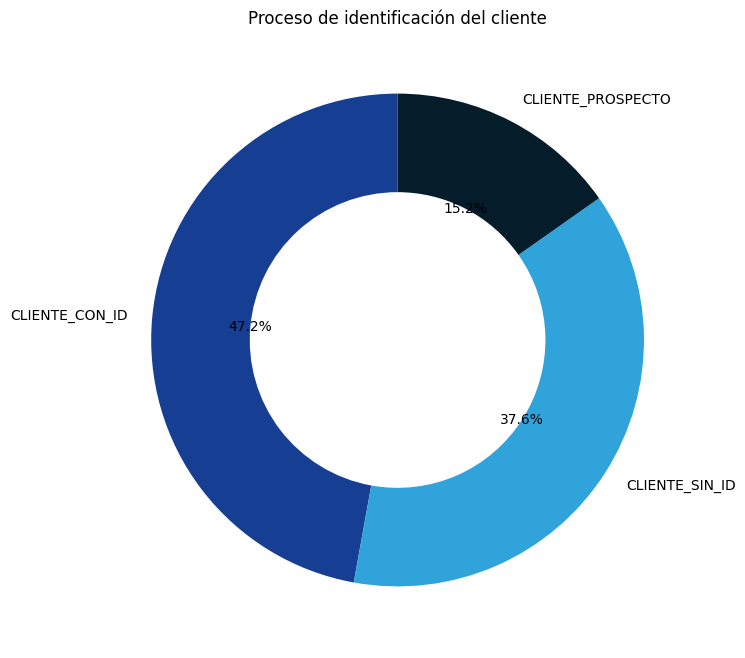

In [ ]:
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']
plt.figure(figsize=(8, 8))
plt.pie(desglose_CATEGORIA_CLIENTE_sr, labels=desglose_CATEGORIA_CLIENTE_sr.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Proceso de identificación del cliente')
plt.show()

# **COLUMNA TIPO DE SERVICIO**

## *Cantidad total de tipo de servicio (por corregir)

In [ ]:
total_TIPO_DE_SERVICIO = df['tipo_de_servicio'].nunique()
total_TIPO_DE_SERVICIO

8

## *Desglose de tipo de servicio (por corregir)

In [ ]:
desglose_TIPO_DE_SERVICIO_sr = df['tipo_de_servicio'].value_counts()
desglose_TIPO_DE_SERVICIO_sr

,count
tipo_de_servicio,
PS,302522
NW,67728
NE,39342
IN,20732
TT,12289
PE,1824
TT,6
AA,5


## *Eliminacion de valores invalidos AA de tipo de servicio

In [ ]:
#Visualizamos los valores errados de AA para ver su index y luego borrarlos
index_AA_para_borrar=df[df['tipo_de_servicio'] == 'AA'].index.tolist()
index_AA_para_borrar

[538, 13233, 109637, 242738, 320222]

In [ ]:
#Con drop borramos y la opcion inplace true par quela elimine del df
df.drop(index_AA_para_borrar,inplace=True)

## *Correcion de valores ' TT' de tipo de servicio

In [ ]:
#Vemos el valor que tiene un espacio de demas
df[df['tipo_de_servicio'] == ' TT']

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,hora_salida_llamada,tiempo_espera_calc(seg),hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg)
68094,1999-03-03,CLIENTE_SIN_ID,0.0,1695,HANG,0,TT,NO_SERVER,AA0108,10:37:26,10:37:48,22,0:00:00,0:00:00,0,0:00:00,0:00:00,0
73097,1999-03-07,CLIENTE_SIN_ID,0.0,2067,HANG,0,TT,NO_SERVER,AA0112,8:24:53,8:25:01,8,0:00:00,0:00:00,0,0:00:00,0:00:00,0
95287,1999-03-24,CLIENTE_SIN_ID,0.0,33340,HANG,0,TT,NO_SERVER,AA0102,15:09:49,15:09:54,5,0:00:00,0:00:00,0,0:00:00,0:00:00,0
95360,1999-03-24,CLIENTE_SIN_ID,0.0,38198,HANG,0,TT,NO_SERVER,AA0105,15:10:34,15:10:39,5,0:00:00,0:00:00,0,0:00:00,0:00:00,0
95414,1999-03-24,CLIENTE_SIN_ID,0.0,2116,HANG,0,TT,NO_SERVER,AA0108,15:09:35,15:09:39,4,0:00:00,0:00:00,0,0:00:00,0:00:00,0
98245,1999-03-26,CLIENTE_SIN_ID,0.0,2135,HANG,0,TT,NO_SERVER,AA0108,8:19:45,8:19:49,4,0:00:00,0:00:00,0,0:00:00,0:00:00,0


In [ ]:
index_TT_con_espacio = [68094,73097,95287,95360,95414,98245]
df.loc[index_TT_con_espacio,'tipo_de_servicio'] = 'TT'

##*Correccion del datatype del tipo de servicio

In [ ]:
df['tipo_de_servicio'] = df['tipo_de_servicio'].astype('category')

In [ ]:
desglose_tipo_de_servicio_sr = df['tipo_de_servicio'].value_counts()
desglose_tipo_de_servicio_sr

,count
tipo_de_servicio,
PS,302522
NW,67728
NE,39342
IN,20732
TT,12295
PE,1824


## Cantidad total de tipo de servicio

In [ ]:
total_TIPO_DE_SERVICIO = df['tipo_de_servicio'].nunique()
total_TIPO_DE_SERVICIO

6

## Desglose de tipo de servicio

In [ ]:
desglose_TIPO_DE_SERVICIO_sr = df['tipo_de_servicio'].value_counts()
desglose_TIPO_DE_SERVICIO_sr

,count
tipo_de_servicio,
PS,302522
NW,67728
NE,39342
IN,20732
TT,12295
PE,1824


## Graficas: Diagrama de barras Tipo de servicio (PS, NW, NE, IN, TT o PE)

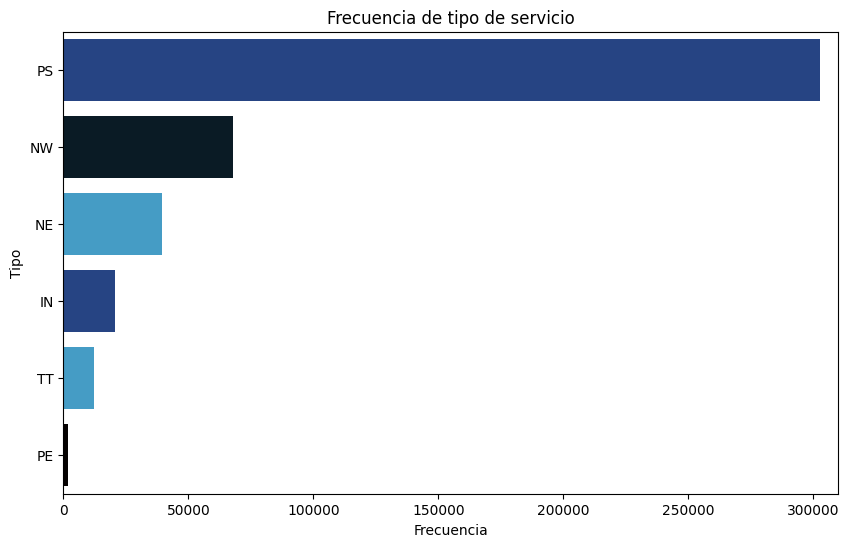

In [ ]:
# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#163E93','#30A3DA']

#Ordena los tipos por frecuencia en orden descendente
orden_descendente_TIPO_DE_SERVICIO = desglose_tipo_de_servicio_sr.index

# Graficamos un barplot de Tipo de servicio
plt.figure(figsize=(10, 6))
sns.barplot(y=desglose_tipo_de_servicio_sr.index, x=desglose_tipo_de_servicio_sr.values, order=orden_descendente_TIPO_DE_SERVICIO , palette=colors, hue=orden_descendente_TIPO_DE_SERVICIO , legend=False)
plt.xlim(0, 310000)  # Ajuste el límite superior según sea necesario
plt.title('Frecuencia de tipo de servicio')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo')
plt.show()

# **COLUMNA FECHAS**

## Cantidad total de fechas

In [ ]:
total_FECHA = df['fecha(a-m-d)'].nunique()
total_FECHA

363

## Desglose

In [ ]:
desglose_FECHA_sr = df['fecha(a-m-d)'].value_counts()
desglose_FECHA_sr  #es una serie

,count
fecha(a-m-d),
1999-05-23,3064
1999-07-04,2589
1999-08-01,2375
1999-08-02,2363
1999-08-03,2345
...,...
1999-09-25,110
1999-04-06,89
1999-07-24,36


## *Conversion a datatime

In [ ]:
df['fecha(a-m-d)'] = pd.to_datetime(df['fecha(a-m-d)'])

## *Correccion de columnas con formato de horas

In [ ]:
df['fecha(a-m-d)2'] = df['fecha(a-m-d)']
df['fecha(a-m-d)2'] = df['fecha(a-m-d)2'].dt.strftime('%Y-%m-%d')

In [ ]:
df['hora_entrada_llamada'] = df['hora_entrada_llamada'].astype(str)
df['hora_entrada_llamada'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_entrada_llamada'])

In [ ]:
df['hora_salida_llamada'] = df['hora_salida_llamada'].astype(str)
df['hora_salida_llamada'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_salida_llamada'])

In [ ]:
df['hora_entrada_cola'] = df['hora_entrada_cola'].astype(str)
df['hora_entrada_cola'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_entrada_cola'])

In [ ]:
df['hora_salida_cola'] = df['hora_salida_cola'].astype(str)
df['hora_salida_cola'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_salida_cola'])

In [ ]:
df['hora_ent_servicio'] = df['hora_ent_servicio'].astype(str)
df['hora_ent_servicio'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_ent_servicio'])

In [ ]:
df['hora_sal_servicio'] = df['hora_sal_servicio'].astype(str)
df['hora_sal_servicio'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_sal_servicio'])

## *Eliminacion de columna FECHA 2

In [ ]:
df.drop('fecha(a-m-d)2',axis=1,inplace=True)

# **COLUMNA SERVIDOR**

## Cantidad total de servidor

In [ ]:
total_SERVIDOR = df['SERVIDOR'].nunique()
total_SERVIDOR

53

## Desglose de servidor

In [ ]:
desglose_SERVIDOR_sr = df['SERVIDOR'].value_counts()
desglose_SERVIDOR_sr

,count
SERVIDOR,
NO_SERVER,96506
SHARON,27492
STEREN,20500
AVNI,20111
MORIAH,19736
AVI,19455
KAZAV,18694
YITZ,17231
TOVA,17072


# **LINEA_VRU**

## Cantidad total de linea VRU

In [ ]:
total_LINEA_VRU = df['Linea_VRU'].nunique()
total_LINEA_VRU

30

## Desglose linea VRU

In [ ]:
desglose_Linea_VRU_sr = df['Linea_VRU'].value_counts()
desglose_Linea_VRU_sr

,count
Linea_VRU,
AA0209,21422
AA0202,21314
AA0206,21086
AA0213,20552
AA0205,20247
AA0203,20056
AA0214,19896
AA0210,19157
AA0204,19010


## Graficas: Grafico circular Porcentaje de lineas en uso

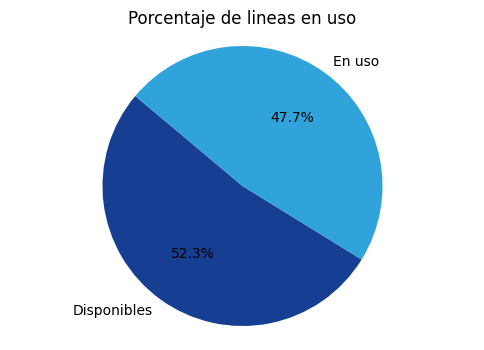

In [ ]:
# Vamos a graficar un pie chart para evidenciar el grado de utilizacion de los vru
datos = {'Status': ['Disponibles', 'En uso'],
        'Contar': [34, 31]}
df_vru = pd.DataFrame(datos)

# Calcular el porcentaje de líneas telefónicas en uso
df_vru['Porcentaje'] = (df_vru['Contar'] / df_vru['Contar'].sum()) * 100

# Definir colores personalizados
colors = ['#163E93', '#30A3DA']

# Traza el gráfico circular con colores personalizados
plt.figure(figsize=(6, 4))
plt.pie(df_vru['Porcentaje'], labels=df_vru['Status'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Porcentaje de lineas en uso')
plt.axis('equal')  # La relación de aspecto igual garantiza que el gráfico circular se dibuje como un círculo.
plt.show()

## Graficas: Diagrama de barras: Frecuencias de Linea VRU

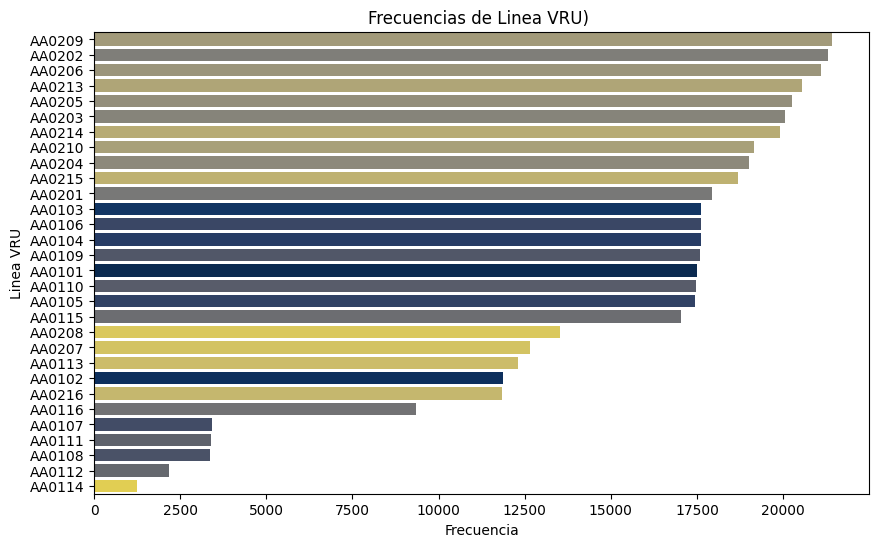

In [ ]:
# Mostramos la utilizacion de las 31 vru que si se utilizan, se puede ver que el grado de utilizacion de las mismas no es homogeneo
plt.figure(figsize=(10, 6))
sns.countplot(y='Linea_VRU', data=df, order=df['Linea_VRU'].value_counts().index,hue='Linea_VRU',palette='cividis')
plt.title('Frecuencias de Linea VRU) ')
plt.xlabel('Frecuencia')
plt.ylabel('Linea VRU')
plt.show()

#**COLUMNA TIPO DE LLAMADA**

## Cantidad total tipo de llamada

In [ ]:
total_tipo_de_llamada = df['tipo_de_llamada'].nunique()
total_tipo_de_llamada

3

## Desglose tipo de llamada

In [ ]:
desglose_tipo_de_llamada_sr = df['tipo_de_llamada'].value_counts()
desglose_tipo_de_llamada_sr

,count
tipo_de_llamada,
AGENT,353143
HANG,87701
PHANTOM,3599


## Grafica circular: tipo de llamada (atendida, fantamas o cuelga)

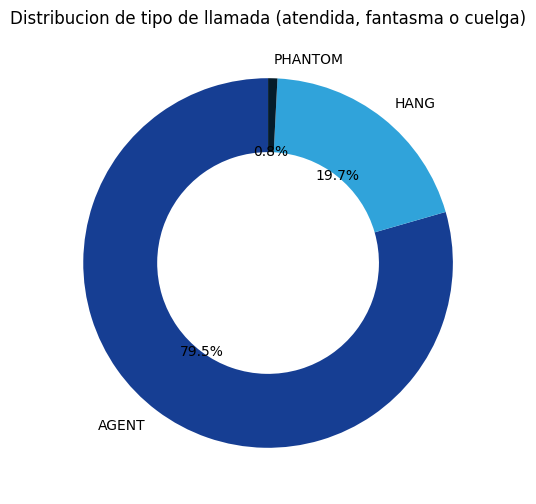

In [ ]:
# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']
# Cree un gráfico de anillos utilizando la función circular con el mapa de colores personalizado
plt.figure(figsize=(6, 6))
plt.pie(desglose_tipo_de_llamada_sr, labels=desglose_tipo_de_llamada_sr.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Distribucion de tipo de llamada (atendida, fantasma o cuelga)')
plt.show()

#**COLUMNA PRIORIDAD**

## Cantidad total de prioridad

In [ ]:
total_PRIORIDAD = df['prioridad'].nunique()
total_PRIORIDAD

3

## Desglose de prioridad

In [ ]:
desglose_PRIORIDAD_sr = df['prioridad'].value_counts()
desglose_PRIORIDAD_sr

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,count
prioridad,
0,235163
2,137453
1,71827


## Grafica: Diagrama de barras de frecuencia de prioridad (0, 1 ó 2)

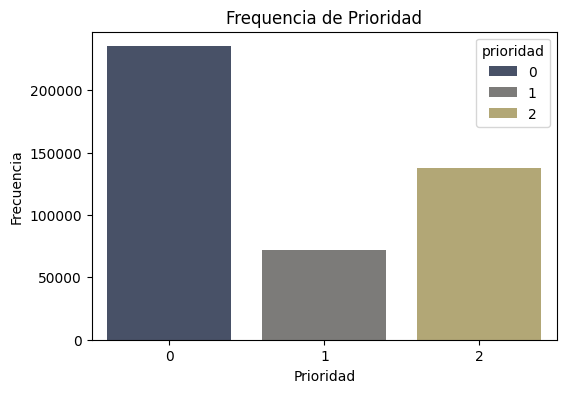

In [ ]:
# Utilice una paleta con la misma cantidad de colores que prioridades únicas
palette = sns.color_palette('cividis', (total_PRIORIDAD))

# Dibuje el gráfico de conteo con la paleta ajustada
plt.figure(figsize=(6, 4))
sns.countplot(x='prioridad', data=df, hue='prioridad', palette='cividis', legend=True)
plt.title('Frequencia de Prioridad')
plt.xlabel('Prioridad')
plt.ylabel('Frecuencia')
plt.show()

# **CALCULOS**

## LLAMADAS POR MES





##*Creacion de nueva columna dia y mes para extraccion de datos de fechas

In [ ]:
# Se agrega una nueva columna para el mes
df['mes'] = df['fecha(a-m-d)'].dt.month
df['mes'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [ ]:
# Se agrega una nueva columna para el dia
df['dia'] = df['fecha(a-m-d)'].dt.day
df['dia'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 11, 12],
      dtype=int32)

### Desglose llamadas por mes

In [ ]:
desglose_LLAMADAS_por_mes_sr = df.groupby('mes').size()
desglose_LLAMADAS_por_mes_sr

,0
mes,
1,31597
2,33344
3,38801
4,32035
5,39553
6,37935
7,39021
8,42078
9,31370


### Promedio llamadas por mes


In [ ]:
promedio_LLAMADAS_por_mes = df['mes'].value_counts().mean()
promedio_LLAMADAS_por_mes

37036.916666666664

### Maximo



In [ ]:
maximo_LLAMADAS_por_mes = df['mes'].value_counts().max()
maximo_LLAMADAS_por_mes

43065

### Minimo

In [ ]:
minimo_LLAMADAS_por_mes=df['mes'].value_counts().min()
minimo_LLAMADAS_por_mes

31370

###Amplitud


In [ ]:
amplitud_LLAMADAS_por_mes= maximo_LLAMADAS_por_mes-minimo_LLAMADAS_por_mes
amplitud_LLAMADAS_por_mes

11695

###Top 4 Minimos

In [ ]:
top4_LLAMADAS_valores_minimos_sr = df['mes'].value_counts().nsmallest(4)
top4_LLAMADAS_valores_minimos_sr

,count
mes,
9,31370
1,31597
4,32035
2,33344


###Top 4 Maximos

In [ ]:
top4_LLAMADAS_valores_maximos_sr = df['mes'].value_counts().nlargest(4)
top4_LLAMADAS_valores_maximos_sr

,count
mes,
12,43065
8,42078
11,41019
5,39553


### Tabla: Desglose llamadas totales por mes y prioridad

In [ ]:
# Agrupamos por mes y prioridad para despues contar el numero de registros
desglose_LLAMADAS_por_mes_y_PRIORIDAD_df = df.groupby(['mes', 'prioridad'],observed=True).size().unstack().fillna(0)
desglose_LLAMADAS_por_mes_y_PRIORIDAD_df

prioridad,0,1,2
mes,,,
1,18222,4530,8845
2,19602,4623,9119
3,15490,7844,15467
4,13879,6274,11882
5,17917,7164,14472
6,20076,5666,12193
7,17220,7583,14218
8,23112,6573,12393
9,21085,3626,6659


###Graficas: Diagrama de barras Volumen de llamadas por mes

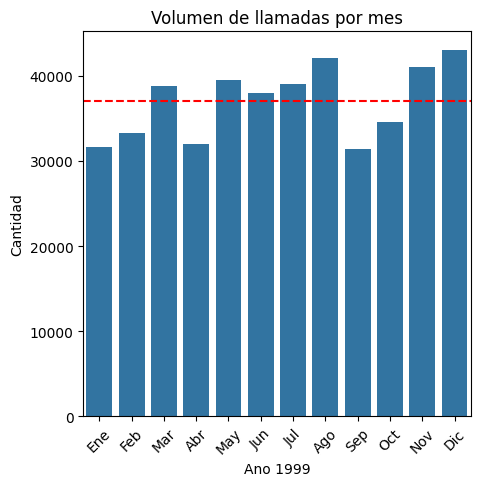

In [ ]:
# Se grafica el volumne de llamadas por mes
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='mes')
# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']
# Ajustamos las x-axis para mostrar los valores de los meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(ticks=range(12), labels=meses, rotation=45) # Pass the list 'meses' as labels
plt.axhline(y=promedio_LLAMADAS_por_mes, color='red', linestyle='--', label='Promedio de llamadas')
plt.xlabel('Ano 1999')
plt.ylabel('Cantidad')
plt.title('Volumen de llamadas por mes')
plt.show()

##LLAMADAS POR DIA

### LUNES A DOMINGO

####Desglose llamadas por dia (lunes a domingo)

In [ ]:
desglose_FECHA_lun_a_dom_sr = df.groupby(df['fecha(a-m-d)'].dt.date).size()
desglose_FECHA_lun_a_dom_sr

,0
fecha(a-m-d),
1999-01-01,599
1999-01-02,253
1999-01-03,2111
1999-01-04,1834
1999-01-05,1629
...,...
1999-12-27,1883
1999-12-28,1768
1999-12-29,1820


#### Estadisticas descriptivas (lunes a domingo)

In [ ]:
descripcion_FECHA_lun_a_dom_sr =desglose_FECHA_lun_a_dom_sr.describe()
descripcion_FECHA_lun_a_dom_sr

,0
count,363.000000
mean,1224.360882
std,642.844356
min,14.000000
25%,546.000000
50%,1443.000000
75%,1713.000000
max,3064.000000


####Graficas: Histograma Distribucion de llamadas (lunes a domingo)

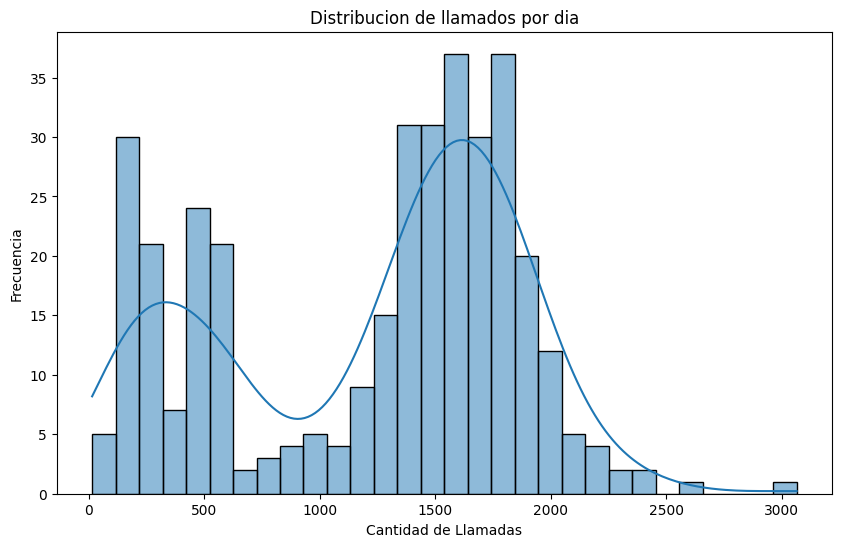

In [ ]:
# Graficamos la informacion
plt.figure(figsize=(10, 6))
sns.histplot(desglose_FECHA_lun_a_dom_sr, bins=30, kde=True)
plt.title('Distribucion de llamados por dia')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

### LUNES A JUEVES

####Tabla de fechas (lunes a jueves)

In [ ]:
tabla_FECHA_lun_a_jue_df = df[df['fecha(a-m-d)'].dt.dayofweek >= 4]
tabla_FECHA_lun_a_jue_df.head(2)

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,hora_salida_llamada,tiempo_espera_calc(seg),hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg),mes,dia
0,1999-01-01,CLIENTE_CON_ID,9664491.0,33116,HANG,2,PS,NO_SERVER,AA0101,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01,1999-01-01,0,1,1
1,1999-01-01,CLIENTE_SIN_ID,0.0,33117,HANG,0,PS,NO_SERVER,AA0101,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01,1999-01-01,0,1,1


#### Desglose de fechas (lunes a jueves)

In [ ]:
desglose_FECHA_lun_a_jue_sr = tabla_FECHA_lun_a_jue_df.groupby(tabla_FECHA_lun_a_jue_df['fecha(a-m-d)'].dt.date).size()
desglose_FECHA_lun_a_jue_sr

,0
fecha(a-m-d),
1999-01-01,599
1999-01-02,253
1999-01-03,2111
1999-01-08,439
1999-01-09,201
...,...
1999-12-19,1601
1999-12-24,487
1999-12-25,221


#### Estadisticas descriptivas (lunes a jueves)

In [ ]:
descripcion_FECHA_lun_a_jue_sr = desglose_FECHA_lun_a_jue_sr.describe()
descripcion_FECHA_lun_a_jue_sr

,0
count,157.000000
mean,803.777070
std,683.834275
min,14.000000
25%,233.000000
50%,509.000000
75%,1519.000000
max,3064.000000


####Graficas: Histograma Distribucion de llamadas (lunes a jueves)

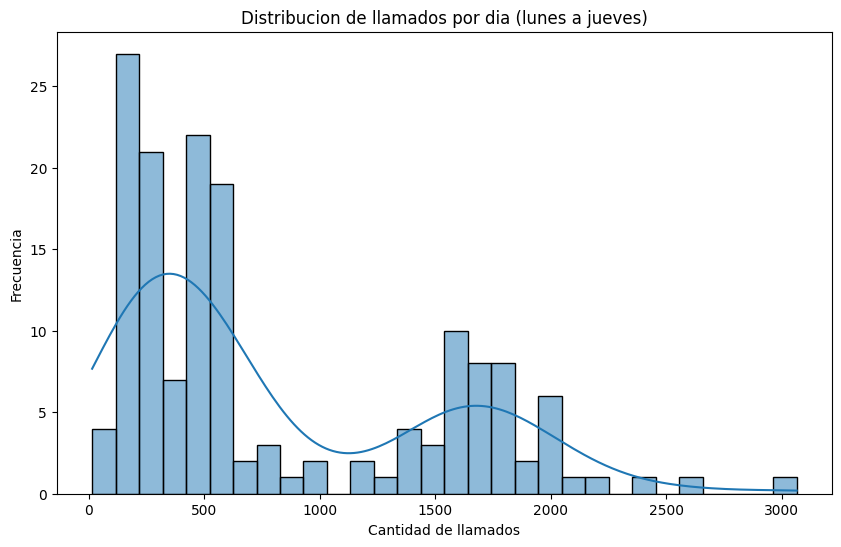

In [ ]:
# Graficamos
plt.figure(figsize=(10, 6))
sns.histplot(desglose_FECHA_lun_a_jue_sr, bins=30, kde=True)
plt.title('Distribucion de llamados por dia (lunes a jueves)')
plt.xlabel('Cantidad de llamados')
plt.ylabel('Frecuencia')
plt.show()

### VIERNES A DOMINGO

####Tabla de fechas (viernes a domingo)

In [ ]:
tabla_FECHA_vie_a_dom_df = df[df['fecha(a-m-d)'].dt.dayofweek >= 4]
tabla_FECHA_vie_a_dom_df.head(2)

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,hora_salida_llamada,tiempo_espera_calc(seg),hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg),mes,dia
0,1999-01-01,CLIENTE_CON_ID,9664491.0,33116,HANG,2,PS,NO_SERVER,AA0101,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01,1999-01-01,0,1,1
1,1999-01-01,CLIENTE_SIN_ID,0.0,33117,HANG,0,PS,NO_SERVER,AA0101,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01,1999-01-01,0,1,1


#### Desglose de fechas (viernes a domingo)

In [ ]:
desglose_FECHA_vie_a_dom_sr = tabla_FECHA_vie_a_dom_df.groupby(tabla_FECHA_vie_a_dom_df['fecha(a-m-d)'].dt.date).size()
desglose_FECHA_vie_a_dom_sr

,0
fecha(a-m-d),
1999-01-01,599
1999-01-02,253
1999-01-03,2111
1999-01-08,439
1999-01-09,201
...,...
1999-12-19,1601
1999-12-24,487
1999-12-25,221


#### Estadisticas descriptivas (viernes a domingo)

In [ ]:
descripcion_FECHA_vie_a_dom_sr = desglose_FECHA_vie_a_dom_sr.describe()
descripcion_FECHA_vie_a_dom_sr

,0
count,157.000000
mean,803.777070
std,683.834275
min,14.000000
25%,233.000000
50%,509.000000
75%,1519.000000
max,3064.000000


####Graficas: Histograma Distribucion de llamadas (viernes a domingo)

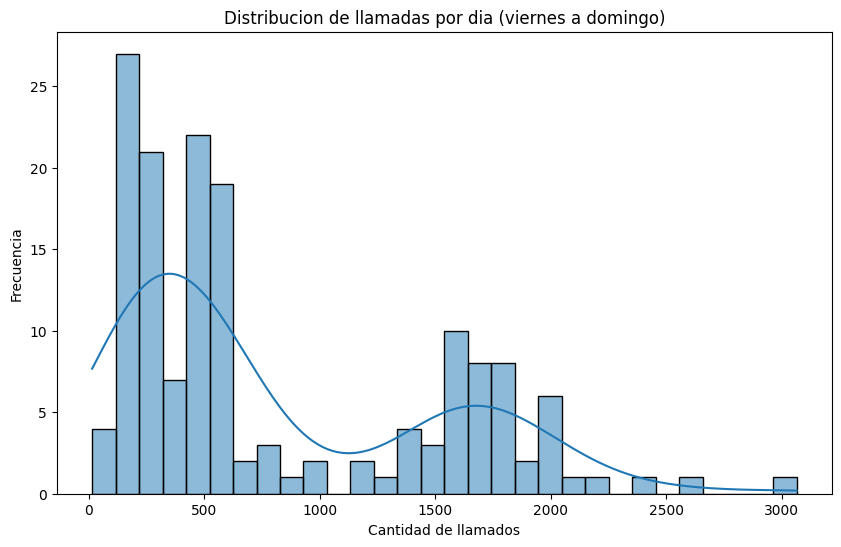

In [ ]:
# Graficamos
plt.figure(figsize=(10, 6))
sns.histplot(desglose_FECHA_vie_a_dom_sr, bins=30, kde=True)
plt.title('Distribucion de llamadas por dia (viernes a domingo)')
plt.xlabel('Cantidad de llamados')
plt.ylabel('Frecuencia')
plt.show()

##LLAMADAS POR HORA POR DIA (LUNES A JUEVES)

####*Extraccion de Tabla de fechas (lunes a jueves)

In [ ]:
# Filtramos de Lunes a Jueves nuevamente
tabla_HORA_lun_a_jue_df = df[(df['fecha(a-m-d)'].dt.dayofweek >= 0) & (df['fecha(a-m-d)'].dt.dayofweek <= 3)].copy()

####Tabla de horas (lunes a jueves)

In [ ]:
# Extraemos la hora de 'hora_entrada_llamada'
tabla_HORA_lun_a_jue_df['hora'] = tabla_HORA_lun_a_jue_df['hora_entrada_llamada'].dt.hour

####Desglose llamadas por hora (lunes a jueves)

In [ ]:
desglose_llamadas_por_hora_lune_a_jue_sr = tabla_HORA_lun_a_jue_df.groupby('hora').size()
desglose_llamadas_por_hora_lune_a_jue_sr

,0
hora,
0,1060
1,378
2,201
3,99
4,107
5,256
6,1232
7,8386
8,17875


#### Graficas: Histograma Distribucion llamadas por hora (lunes a jueves)

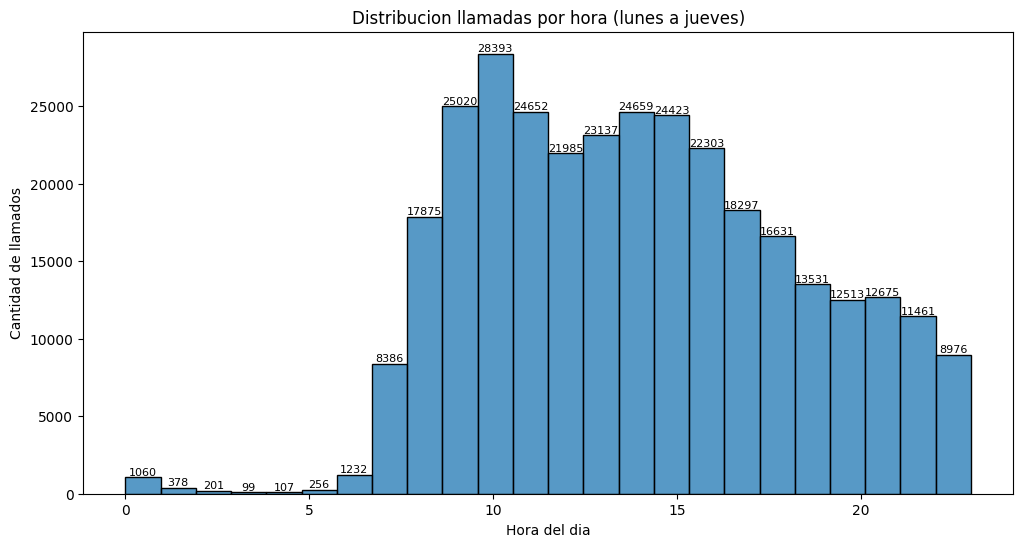

In [ ]:
# Plot histogram
plt.figure(figsize=(12, 6))
ax= sns.histplot(tabla_HORA_lun_a_jue_df['hora'], bins=24, kde=False)
plt.title('Distribucion llamadas por hora (lunes a jueves)')
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de llamados')
# Agregar etiquetas de valores con formato
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)

plt.show()

####Estadisticas descriptivas de llamadas por hora (lunes a jueves)

In [ ]:
descripicion_llamadas_por_hora_lune_a_jue_sr = desglose_llamadas_por_hora_lune_a_jue_sr.describe()
descripicion_llamadas_por_hora_lune_a_jue_sr

,0
count,24.000000
mean,13260.416667
std,9905.542366
min,99.000000
25%,1189.000000
50%,13103.000000
75%,22511.500000
max,28393.000000


####Tabla dinamica llamadas por hora (lunes a jueves)

In [ ]:
# creamos una tabla pivot para poder ver la distribucion de llamadas por hora por dia
tabla_dinamica_llamadas_por_hora_lune_a_jue_df = tabla_HORA_lun_a_jue_df.pivot_table(index='hora', columns=tabla_HORA_lun_a_jue_df['fecha(a-m-d)'].dt.dayofweek, aggfunc='size')

# Renombramos las columnas
nombres_dias = ['Lunes', 'Martes', 'Miercoles', 'Jueves']
tabla_dinamica_llamadas_por_hora_lune_a_jue_df.columns = nombres_dias
# Display the pivot table
tabla_dinamica_llamadas_por_hora_lune_a_jue_df


,Lunes,Martes,Miercoles,Jueves
hora,,,,
0,267,267,253,273
1,112,87,102,77
2,49,55,46,51
3,28,19,34,18
4,23,24,34,26
5,78,68,54,56
6,364,285,306,277
7,2466,1987,1951,1982
8,4547,4511,4434,4383


#### Graficas: Mapa de calor llamadas por hora por dia (lunes a jueves)

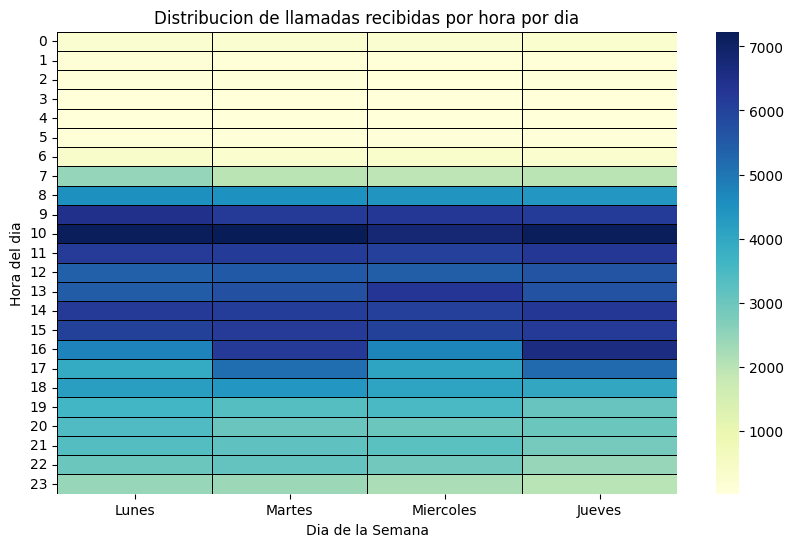

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_dinamica_llamadas_por_hora_lune_a_jue_df, cmap="YlGnBu", linewidths=0.5, linecolor='black')
plt.title('Distribucion de llamadas recibidas por hora por dia')
plt.xlabel('Dia de la Semana')
plt.ylabel('Hora del dia')
plt.yticks(rotation=0)
plt.show()

####Conclusiones de llamadas por hora por dia (lunes a jueves)

*   Podemos ver que para todos los dias de Lunes a Jueves, los picos de demanda se repiten en los horarios de 10hs a 15 hs. para todos los dias de manera consistente.<br>
*   Podemos afirmar que estos son los picos de demanda, y que luego de las 15hs se mantiene elevada la actividad del call center<br>
*   Ademas podemos decir, que en las franjas iniciales de actividad de 7 am a 10am, y luego en la franja posterior al pico de las 15hs, de 17 a 22hs el nivel de actividad es bastante constante.


#### Promedio llamadas promedio por hora por dia

In [ ]:
promedio_LLAMADAS_por_hora_por_dia_lun_a_jue = tabla_HORA_lun_a_jue_df.groupby(['fecha(a-m-d)', 'hora']).size().groupby('hora').mean()
promedio_LLAMADAS_por_hora_por_dia_lun_a_jue

,0
hora,
0,5.520833
1,2.454545
2,1.827273
3,1.523077
4,1.573529
5,1.984496
6,6.285714
7,41.721393
8,88.490099


####Estadisticas descriptivas

In [ ]:
promedio_LLAMADAS_por_hora_por_dia_lun_a_jue.describe()

,0
count,24.000000
mean,65.879657
std,48.837626
min,1.523077
25%,6.094494
50%,64.546798
75%,111.855050
max,141.258706


####Promedio del promedio

In [ ]:
promedio_promedio_LLAMADAS_por_hora_por_dia_lun_a_jue= promedio_LLAMADAS_por_hora_por_dia_lun_a_jue.mean()
promedio_promedio_LLAMADAS_por_hora_por_dia_lun_a_jue

65.87965719425937

Graficas: Diagrama de barras promedio llamadas por hora por dia (lunes a jueves)

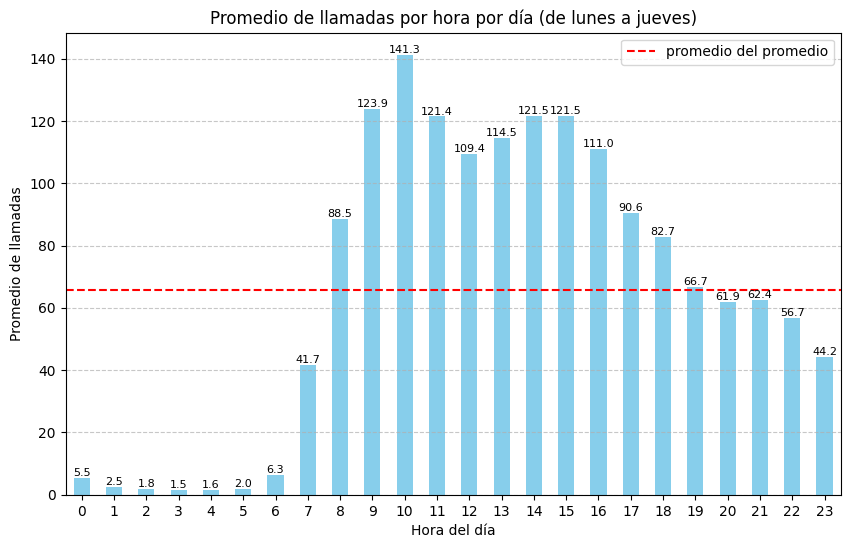

In [ ]:
plt.figure(figsize=(10, 6))
ax=promedio_LLAMADAS_por_hora_por_dia_lun_a_jue.plot(kind='bar', color='skyblue')
plt.title('Promedio de llamadas por hora por día (de lunes a jueves)')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de llamadas')

plt.axhline(y=promedio_promedio_LLAMADAS_por_hora_por_dia_lun_a_jue, color='red', linestyle='--', label='promedio del promedio')
plt.legend()

for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

####Conclusiones de promedio de llamadas por hora por dia (lunes a jueves)

Se ve claramente que los picos se repiten para todos los dias, de lunes a jueves;
* El **maximo** de llamadas por hora que se ha registrado es de **141 llamadas en la misma hora**
* El **minimo** de llamadas recibidas en una hora es de **2 llamadas**
* El **promedio de llamadas por hora es de 65 llamadas**.
* El **75%** de las veces se reciben menos de **111 llamadas por hora**

# **COLUMNA TIEMPO DE ESPERA**

####*Estadisticas descriptivas con error

In [ ]:
descripcion_TIEMPO_DE_ESPERA_lun_a_jue = df['tiempo_espera_calc(seg)'].describe()
descripcion_TIEMPO_DE_ESPERA_lun_a_jue

,tiempo_espera_calc(seg)
count,444443.000000
mean,10.285917
std,34.942273
min,-362.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,4832.000000


####*Conteo y porcentaje de valores negativos

In [ ]:
total_tiempo_espera_negativos = (df['tiempo_espera_calc(seg)'] < 0).sum()
total_tiempo_espera_negativos

350

In [ ]:
porcentaje_tiempo_espera_negativos = round(total_tiempo_espera_negativos/df['tiempo_espera_calc(seg)'].count()*100, 2)
porcentaje_tiempo_espera_negativos

0.08

##*Correccion de columna hora de entrada de llamada

In [ ]:
df['hora_entrada_llamada_corr'] = np.where(df['hora_entrada_llamada'] > df['hora_salida_llamada'], df['hora_salida_llamada'], df['hora_entrada_llamada'])

In [ ]:
df['hora_salida_llamada'] = np.where(df['hora_entrada_llamada'] > df['hora_salida_llamada'], df['hora_entrada_llamada'], df['hora_salida_llamada'])

In [ ]:
df['tiempo_espera_calc(seg)_corr'] = (df['hora_salida_llamada'] - df['hora_entrada_llamada_corr']).dt.total_seconds()

In [ ]:
df['tiempo_espera_calc(seg)_corr'] = df['tiempo_espera_calc(seg)_corr'].astype('int64')

##Estadisticas descriptivas corregidas

In [ ]:
descripcion_TIEMPO_DE_ESPERA_lun_a_jue = df['tiempo_espera_calc(seg)_corr'].describe()

##*Eliminacion de valores

In [ ]:
df['tiempo_espera_calc(seg)'] = df['tiempo_espera_calc(seg)_corr']
df.drop('tiempo_espera_calc(seg)_corr',axis=1,inplace=True)

##Graficas: Diagrama de caja tiempos de espera

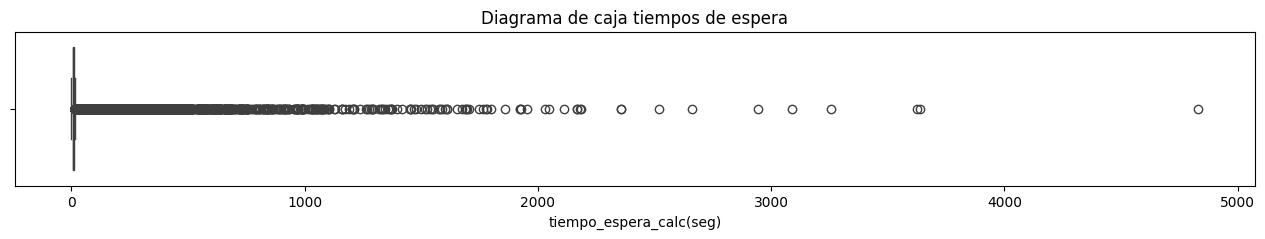

In [ ]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['tiempo_espera_calc(seg)'])
plt.title('Diagrama de caja tiempos de espera')
plt.xlabel('tiempo_espera_calc(seg)')
plt.show()

##Graficas: Diagrama de franjas

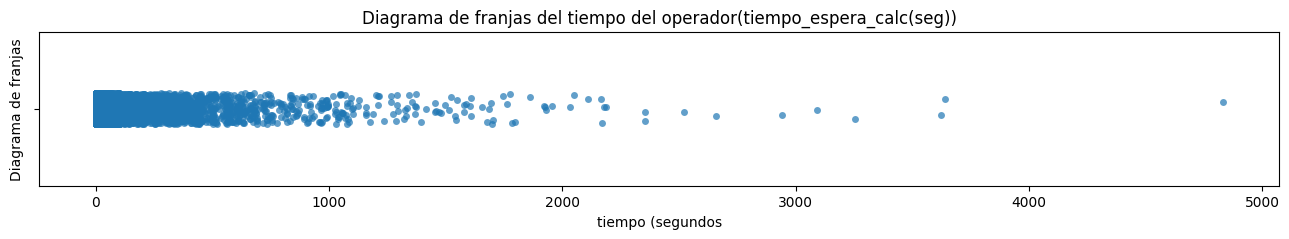

In [ ]:
plt.figure(figsize=(16, 2))
sns.stripplot(data=df, x='tiempo_espera_calc(seg)', jitter=True, alpha=0.7)
plt.xlabel('tiempo (segundos')
plt.ylabel('Diagrama de franjas')
plt.title('Diagrama de franjas del tiempo del operador(tiempo_espera_calc(seg))')
plt.show()

##*Outliers de tiempos de espera conteo y porcentaje

In [ ]:
outlier_conteo_mayor_16seg = (df['tiempo_espera_calc(seg)'] > 16).sum()

In [ ]:
outlier_porcentaje_mayor_16seg = round(outlier_conteo_mayor_16seg  /df['tiempo_espera_calc(seg)'].count()*100,2)

In [ ]:
outlier_conteo_mayor_1000seg = (df['tiempo_espera_calc(seg)'] > 1000).sum()


In [ ]:
outlier_porcentaje_mayor_1000seg  = round(outlier_conteo_mayor_1000seg/df['tiempo_espera_calc(seg)'].count()*100,2)

##*Eliminacion de ouliers

In [ ]:
df = df[df['tiempo_espera_calc(seg)'] <=1000]
(df['tiempo_espera_calc(seg)'] > 1000).sum()

0

## Estadisticas descriptivas corregidas

In [ ]:
descripcion_tiempos_espera_lun_a_jue = df['tiempo_espera_calc(seg)'].describe()
descripcion_tiempos_espera_lun_a_jue

,tiempo_espera_calc(seg)
count,444333.000000
mean,10.013888
std,23.049743
min,0.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,997.000000


## Conclusiones de tiempo de espera

Los tiempos entre que una llamada es recepcionada y asignada al VRU correspondiente tiene una duracion promedio de 10 segundos.

El valor maximo es de unos 4832 segundos (80 minutos).

El valor minimo es 0 segundos

El 75% de las llamadas son enviadas a cola en menos de 10 segundos. Esto es 333.250 llamados.

Analizando las graficas de los Boxplots y la dispersion y los calculos de los outliers vemos que:

hay 26.333 llamadas con tiempos mayores a los 16 segundos, representando alrededor del 6% de todos los registros. Estos registros podrian ser considerados atipicos o desvios.
Tiempos entre los 16 segundos y hasta 1000 segundos (aproximadamente 16 minutos), se considerarian normales.
De esta forma, podriamos clasificar como outliers solamente 110 llamadas, que representan el 0.02% del total de los llamados recibidos.
procedemos a eliminar estos registros.

## Desglose tiempo de espera (lunes a jueves)

In [ ]:
desglose_tiempo_de_espera_lun_a_jue_sr = df['tiempo_espera_calc(seg)'].value_counts().sort_index()
desglose_tiempo_de_espera_lun_a_jue_sr

,count
tiempo_espera_calc(seg),
0,8696
1,1708
2,6568
3,1797
4,1934
...,...
990,3
991,1
995,1


In [ ]:
tabla_llamadas_validas = df[df['tiempo_espera_calc(seg)'] > 0]
tabla_llamadas_validas.head(2)

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,...,tiempo_espera_calc(seg),hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg),mes,dia,hora_entrada_llamada_corr
0,1999-01-01,CLIENTE_CON_ID,9664491.0,33116,HANG,2,PS,NO_SERVER,AA0101,1999-01-01 00:00:31,...,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01,1999-01-01,0,1,1,1999-01-01 00:00:31
1,1999-01-01,CLIENTE_SIN_ID,0.0,33117,HANG,0,PS,NO_SERVER,AA0101,1999-01-01 00:34:12,...,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01,1999-01-01,0,1,1,1999-01-01 00:34:12


## Graficas: Histograma distribucion tiempos de espera

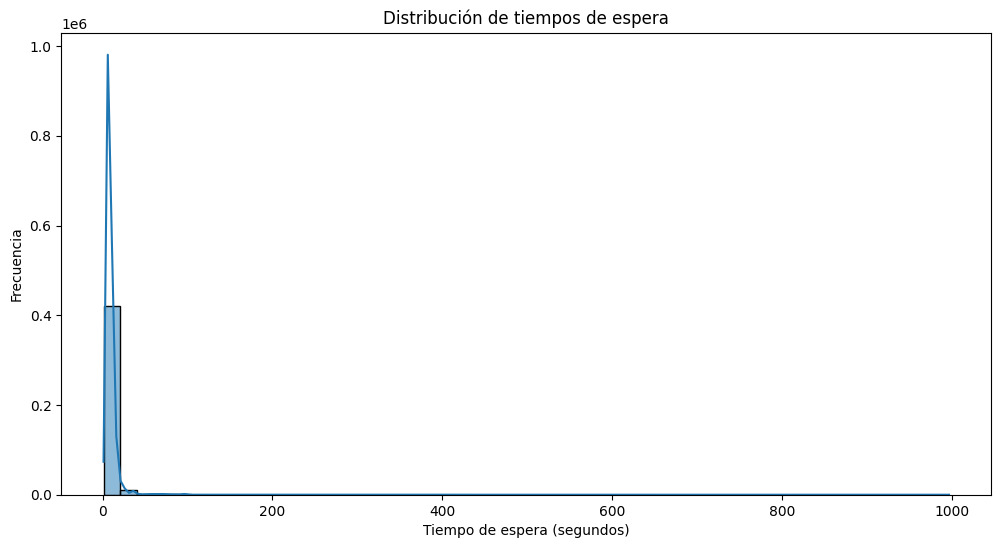

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(tabla_llamadas_validas['tiempo_espera_calc(seg)'], bins=50, kde=True)
plt.title('Distribución de tiempos de espera')
plt.xlabel('Tiempo de espera (segundos)')
plt.ylabel('Frecuencia')
plt.show()

# **COLUMNA: HORA DE ENTRADA Y SALIDA EN COLA**

In [ ]:
tabla_HORA_lun_a_jue_df['hora_entrada_cola'] = tabla_HORA_lun_a_jue_df['hora_entrada_cola'].dt.hour

In [ ]:
tabla_HORA_lun_a_jue_df['hora_salida_cola'] = tabla_HORA_lun_a_jue_df['hora_salida_cola'].dt.hour

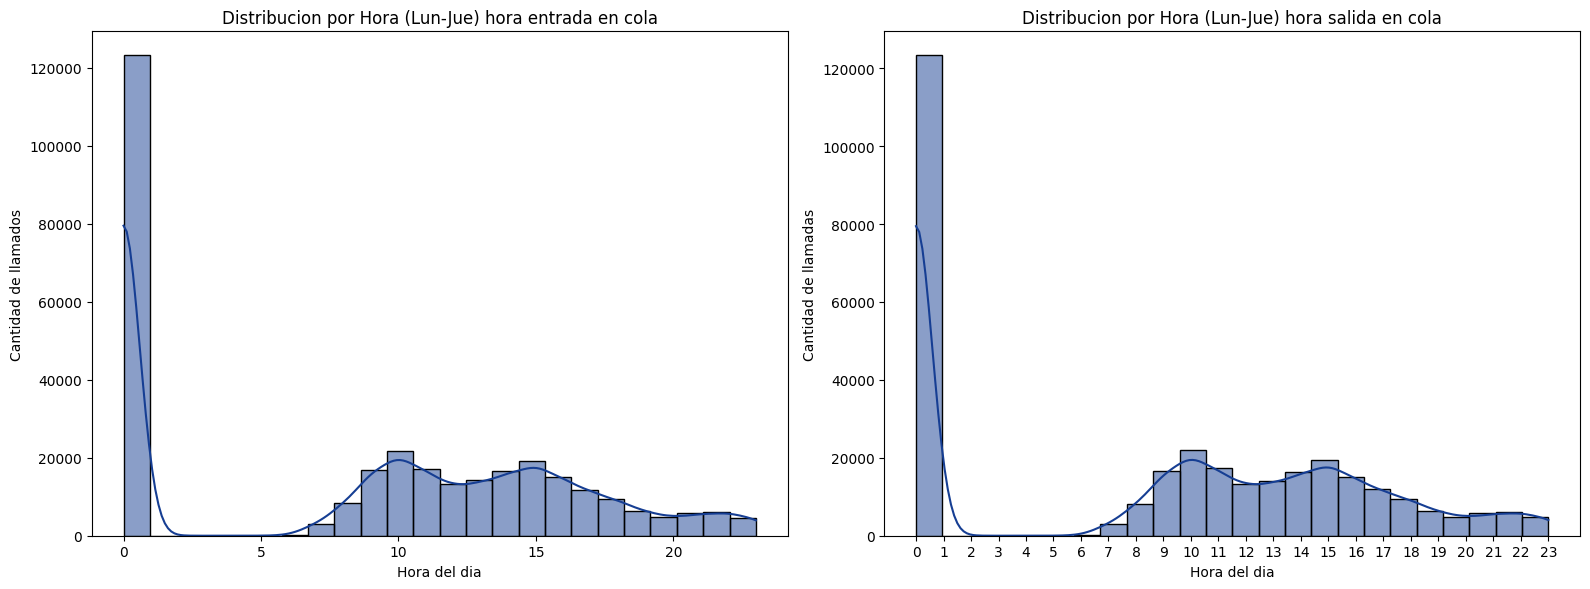

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.histplot(tabla_HORA_lun_a_jue_df['hora_entrada_cola'], bins=24, kde=True, color='#163E93', ax=axes[0])
axes[0].set_title('Distribucion por Hora (Lun-Jue) hora entrada en cola')
axes[0].set_xlabel('Hora del dia')
axes[0].set_ylabel('Cantidad de llamados')

plt.xticks(ticks=range(24), labels=range(24))  # Especifica las posiciones y etiquetas exactas
plt.tight_layout()  # Ajusta el diseño de la gráfica


sns.histplot(tabla_HORA_lun_a_jue_df['hora_salida_cola'], bins=24, kde=True, color='#163E93', ax=axes[1])
axes[1].set_title('Distribucion por Hora (Lun-Jue) hora salida en cola')
axes[1].set_xlabel('Hora del dia')
axes[1].set_ylabel('Cantidad de llamadas')

plt.xticks(ticks=range(24), labels=range(24))  # Especifica las posiciones y etiquetas exactas
plt.tight_layout()  # Ajusta el diseño de la gráfica


plt.tight_layout()
plt.show()

## TASA DE ABANDONO

## Tabla con clientes que abandonan en cola

In [ ]:
# Filtramos a los clientes que abandonan en q_entry == '00:00:00'
abandonan_hora_entrada_cola = df[df['hora_entrada_cola'].dt.time == pd.to_datetime('00:00:00').time()] # 180.734 rows

## Cantidad total de clientes que abandonan en cola

In [ ]:
# Cuantos son los que abandonan
cant_abandonan_q_start = abandonan_hora_entrada_cola['ID_de_llamada'].count()
cant_abandonan_q_start

180734

##Porcentaje total de clientes que abandonan en cola

In [ ]:
# cual es el porcentaje del total
porcentaje_abandono = round(((cant_abandonan_q_start)/(total_ID_de_CLIENTE)*100),0)
porcentaje_abandono

41.0

## Tasa de abandono real

### Tabla con clientes que hora entrada cero y hora de servcio cero

In [ ]:
abandonan_q = df[(df['hora_entrada_cola'].dt.time == pd.to_datetime('00:00:00').time()) & (df['hora_ent_servicio'].dt.time == pd.to_datetime('00:00:00').time())]  # 23.828 rows

###Cantidad total de clientes que hora entrada cero y hora de servcio cero

In [ ]:
cant_abandonan_q = abandonan_q['ID_de_llamada'].count()
cant_abandonan_q

23828

###Porcentaje de clientes que hora entrada cero y hora de servcio cero

In [ ]:
porcentaje_abandono_q = round((cant_abandonan_q / total_ID_de_CLIENTE) * 100, 0)
porcentaje_abandono_q

5.0

###Cantidad total de clientes que abandonan en servicio

In [ ]:
cant_abandonan_ser= df[(df['hora_entrada_cola'].dt.time != pd.to_datetime('00:00:00').time()) & (df['hora_ent_servicio'].dt.time == pd.to_datetime('00:00:00').time())]['ID_de_llamada'].count() # 63210
cant_abandonan_ser

63210

###Porcentaje total de clientes que abandonan en servicio

In [ ]:
porcentaje_abandonan_ser = round(((cant_abandonan_ser)/(total_ID_de_CLIENTE)*100),0)
porcentaje_abandonan_ser

14.0

###Cantidad total de clientes que no abandonan

In [ ]:
no_abandonan = df[(df['hora_entrada_cola'].dt.time != pd.to_datetime('00:00:00').time()) & (df['hora_ent_servicio'].dt.time != pd.to_datetime('00:00:00').time())]['ID_de_llamada'].count()
no_abandonan

200389

# **CREACION DE CATEGORIA DE ABANDONO**

In [ ]:
df['CATEGORIA_DE_ABANDONO'] = df['CATEGORIA_CLIENTE']
df['CATEGORIA_DE_ABANDONO'] = df['CATEGORIA_DE_ABANDONO'].astype(str)

##Creacion de subcategorias

###Abandonado en espera

In [ ]:
df.loc[(df['hora_entrada_cola'].dt.time == pd.to_datetime('00:00:00').time()) & (df['hora_ent_servicio'].dt.time == pd.to_datetime('00:00:00').time()), 'CATEGORIA_DE_ABANDONO'] = 'ABANDONADO_EN_ESPERA'

### Abandonado en servicio

In [ ]:
df.loc[(df['hora_entrada_cola'].dt.time != pd.to_datetime('00:00:00').time()) & (df['hora_ent_servicio'].dt.time == pd.to_datetime('00:00:00').time()), 'CATEGORIA_DE_ABANDONO'] = 'ABANDONADO_EN_SERVICIO'

### No abandonado

In [ ]:
df.loc[(df['CATEGORIA_DE_ABANDONO'] != 'ABANDONADO_EN_ESPERA') & (df['CATEGORIA_DE_ABANDONO'] != 'ABANDONADO_EN_SERVICIO'), 'CATEGORIA_DE_ABANDONO'] = 'NO_ABANDONADO'

##Porcentaje de Abandonado en espera

In [ ]:
porcentaje_ABANDONADO_EN_ESPERA = round((df[df['CATEGORIA_DE_ABANDONO'] == 'ABANDONADO_EN_ESPERA'].shape[0] / len(df)) * 100,0)
porcentaje_ABANDONADO_EN_ESPERA

5.0

##Porcentaje de Abandonado en servicio

In [ ]:
porcentaje_ABANDONADO_EN_SERVICIO = round((df[df['CATEGORIA_DE_ABANDONO'] == 'ABANDONADO_EN_SERVICIO'].shape[0] / len(df)) * 100,0)

##Porcentaje de No Abandonado

In [ ]:
porcentaje_NO_ABANDONADO = round((df[df['CATEGORIA_DE_ABANDONO'] == 'NO_ABANDONADO'].shape[0] / len(df)) * 100,0)

## Total de subcategorias de abandono

In [ ]:
total_CATEGORIA_DE_ABANDONO = df['CATEGORIA_DE_ABANDONO'].nunique()
total_CATEGORIA_DE_ABANDONO

3

##Desglose de subcategorias de abandono

In [ ]:
# Agrupamos por cantidad para cada valor de la serie
desglose_CATEGORIA_DE_ABANDONO = df['CATEGORIA_DE_ABANDONO'].value_counts()
desglose_CATEGORIA_DE_ABANDONO

,count
CATEGORIA_DE_ABANDONO,
NO_ABANDONADO,357295
ABANDONADO_EN_SERVICIO,63210
ABANDONADO_EN_ESPERA,23828


##Graficas: Grafico circular de subcategorias de abandono

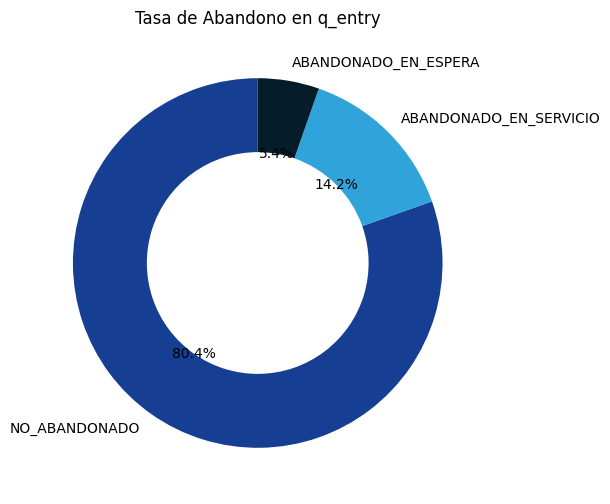

In [ ]:
# Mckinsey-inspired colors
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']
# Create a pie chart using the Mackinsley-inspired colors
plt.figure(figsize=(6, 6))
plt.pie(desglose_CATEGORIA_DE_ABANDONO, labels=desglose_CATEGORIA_DE_ABANDONO.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Tasa de Abandono en q_entry')
plt.show()

## Tabla filtrada con clientes que abandonan

In [ ]:
df_filtro_abandonan = df[(df['CATEGORIA_DE_ABANDONO'] == 'ABANDONADO_EN_ESPERA') | (df['CATEGORIA_DE_ABANDONO'] == 'ABANDONADO_EN_SERVICIO')]
df_filtro_abandonan.head(2)

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,...,hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg),mes,dia,hora_entrada_llamada_corr,CATEGORIA_DE_ABANDONO
0,1999-01-01,CLIENTE_CON_ID,9664491.0,33116,HANG,2,PS,NO_SERVER,AA0101,1999-01-01 00:00:31,...,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01,1999-01-01,0,1,1,1999-01-01 00:00:31,ABANDONADO_EN_SERVICIO
1,1999-01-01,CLIENTE_SIN_ID,0.0,33117,HANG,0,PS,NO_SERVER,AA0101,1999-01-01 00:34:12,...,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01,1999-01-01,0,1,1,1999-01-01 00:34:12,ABANDONADO_EN_ESPERA


## Cantidad total de clientes que abandonan

In [ ]:
df_filtro_abandonan['ID_de_CLIENTE'].count()

87029

##Desglose de cantidades por subcategorias de abandono

In [ ]:
desglose_cantidades_por_CATEGORIA_DE_ABANDONO = df_filtro_abandonan['CATEGORIA_CLIENTE'].value_counts()
desglose_cantidades_por_CATEGORIA_DE_ABANDONO

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,36664
CLIENTE_PROSPECTO,26027
CLIENTE_SIN_ID,24347


##Promedio tiempo de espera desglosado en subcategorias de abandono

In [ ]:
promedio_TIEMPO_DE_ESPERA = df_filtro_abandonan.groupby('CATEGORIA_CLIENTE')['tiempo_espera_calc(seg)'].mean()
promedio_TIEMPO_DE_ESPERA

,tiempo_espera_calc(seg)
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,5.999045
CLIENTE_PROSPECTO,12.210666
CLIENTE_SIN_ID,34.823839


In [ ]:
# Calculamos el total por categoria
total_count = promedio_TIEMPO_DE_ESPERA.sum()
total_count

53.03354989807869

In [ ]:
# Calculamos el porcentaje para cada categoria sobre el total de abandonos
category_percentages = round((category_counts / total_count) * 100,0)
category_percentages

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,69134.0
CLIENTE_PROSPECTO,49076.0
CLIENTE_SIN_ID,45909.0


In [ ]:
# Guardamos esta informacion en un dataframe para verlo como tabla
result_df = pd.DataFrame({'Count': category_counts, 'Percentage': category_percentages})
result_df

,Count,Percentage
CATEGORIA_CLIENTE,,
CLIENTE_CON_ID,36664,69134.0
CLIENTE_PROSPECTO,26027,49076.0
CLIENTE_SIN_ID,24347,45909.0


In [ ]:
# Calculamos la tasa de abandono por categorias
total_LLAMADAS_abandonadas_sr = df_filtro_abandonan['CATEGORIA_CLIENTE'].value_counts()
total_LLAMADAS_abandonadas_sr

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,36664
CLIENTE_PROSPECTO,26027
CLIENTE_SIN_ID,24347


## Desglose tiempos promedios de espera agrupados por categoria

In [ ]:
# Calculamos el tiempo de espera calculado promedio por categoria de cliente
desglose_tiempo_espera_prom_por_categoria = df_filtro_abandonan.groupby('CATEGORIA_CLIENTE')['tiempo_espera_calc(seg)'].mean()
desglose_tiempo_espera_prom_por_categoria

,tiempo_espera_calc(seg)
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,5.999045
CLIENTE_PROSPECTO,12.210666
CLIENTE_SIN_ID,34.823839


## Graficas: Diagrama de barras Cantidad de Abandonos y Promedio de tiempo de espera por Categoria

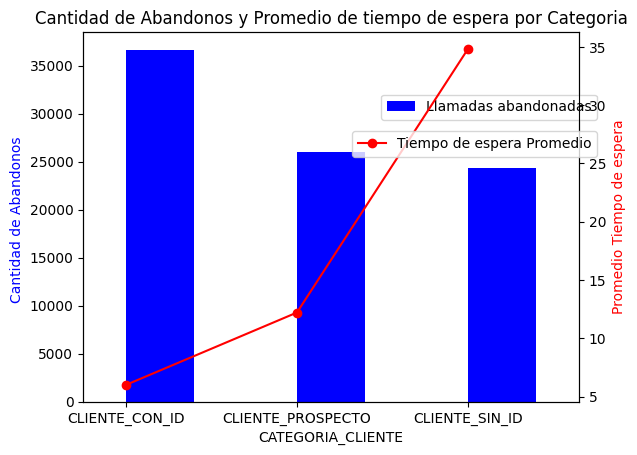

In [ ]:
# Vamos a graficarlos
fig, ax1 = plt.subplots()
# Garficamos con barras las llamadas que abandonan
total_LLAMADAS_abandonadas_sr.plot(kind='bar', ax=ax1, color='b', position=0, width=0.4, label='Llamadas abandonadas')
# Creamos un segundo grafico para el promedio
ax2 = ax1.twinx()
desglose_tiempo_espera_prom_por_categoria.plot(kind='line', ax=ax2, color='r', marker='o', label='Tiempo de espera Promedio')
ax1.set_xlabel('CATEGORIA_CLIENTE')
ax1.set_ylabel('Cantidad de Abandonos ', color='b')
ax2.set_ylabel('Promedio Tiempo de espera', color='r')
plt.title('Cantidad de Abandonos y Promedio de tiempo de espera por Categoria')
ax1.tick_params(axis='x', rotation=0)
ax1.legend(loc='upper right', bbox_to_anchor=(1.05, 0.85))
ax2.legend(loc='upper right', bbox_to_anchor=(1.05, 0.75))
plt.show()

##Conclusiones de Tasa de Abandono

Como pudimos ver, el 42% de los llamados que abandonan son llamados que no han podido ser identificados. y el 58% corresponden a clientes sin identificar. Pudimos analizar este comportamiento contra el tiempo de espera en el vru_time y validar que no tiene incidencia en la tasa de abandonos.

Solo podemos decir como conclusión que la tasa de abandono era en principio muy alta pero analizando los datos en corrección podemos ver que la tasa baja del 60% al 20%.

#**COLUMNA TIEMPO DE ESPERA**

## Correccion tiempo_cola_calc con funcion

In [ ]:
# Se agrega una columna con los tiempos reales de espera (es decir, se les resta al q_time de los clientes con prioridad == 2 los 90 segundos que se adicionaron para aumentarles la prioridad)
def corregir_tiempo_cola_calc(row):
    if row['prioridad'] == 2:
        modified_value = row['tiempo_cola_calc(seg)'] - 90
        return max(modified_value, 0)
    else:
        return row['tiempo_cola_calc(seg)']

# Corregimos directamente sobre la columna q_time
df['tiempo_cola_calc(seg)'] = df.apply(corregir_tiempo_cola_calc, axis=1)

## Descripcion del tiempo de cola calculado

In [ ]:
df['tiempo_cola_calc(seg)'].describe()

,tiempo_cola_calc(seg)
count,444333.000000
mean,42.300133
std,113.657125
min,0.000000
25%,0.000000
50%,0.000000
75%,44.000000
max,28693.000000


## Graficas: Diagrama de caja outliers de tiempo de cola

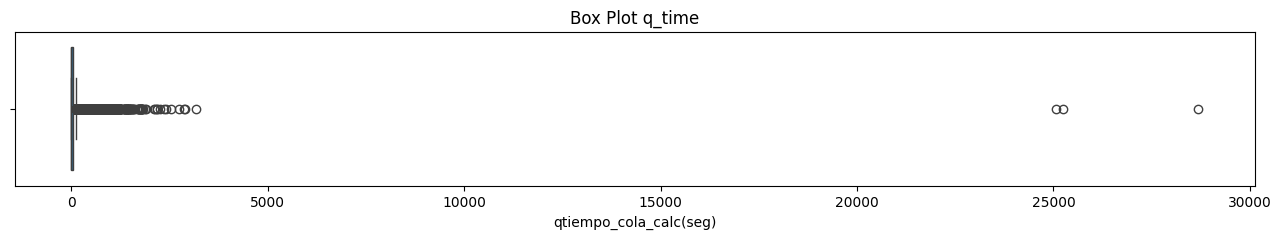

In [ ]:
# Box plot
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['tiempo_cola_calc(seg)'])
plt.title('Box Plot q_time')
plt.xlabel('qtiempo_cola_calc(seg)')
plt.show()

## Graficas: Diagrama de franjas outliers de tiempo de cola

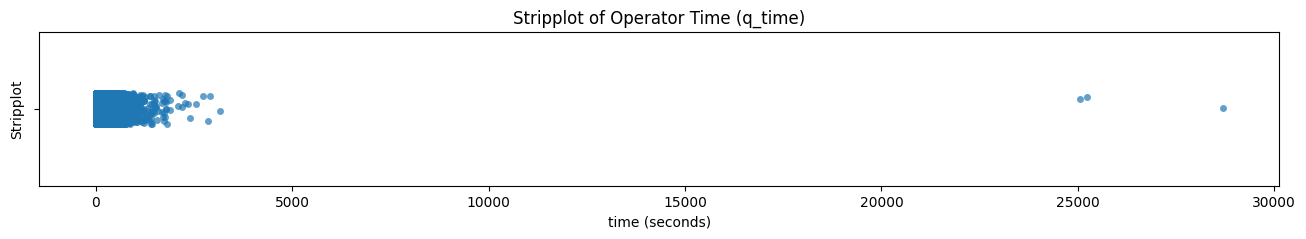

In [ ]:
plt.figure(figsize=(16, 2))
sns.stripplot(data=df, x='tiempo_cola_calc(seg)', jitter=True, alpha=0.7)
plt.xlabel('time (seconds)')
plt.ylabel('Stripplot')
plt.title('Stripplot of Operator Time (q_time)')
plt.show()

## Graficas: Diagrama de caja outliers AUMENTADO de tiempo de cola

Text(0.5, 1.0, 'Zoomed Boxplot for Values < 30 seconds')

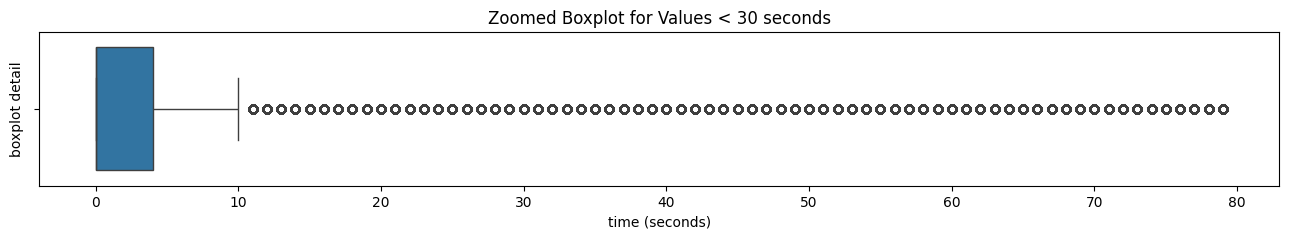

In [ ]:
# Zoomed Box Plot
plt.figure(figsize=(16, 2))
sns.boxplot(data=df[df['tiempo_cola_calc(seg)'] < 80], x='tiempo_cola_calc(seg)')
plt.xlabel('time (seconds)')
plt.ylabel('boxplot detail')
plt.title('Zoomed Boxplot for Values < 30 seconds')


##Comprobacion deeliminacion de outliers

In [ ]:
df = df[df['tiempo_cola_calc(seg)'] < 20000]
(df['tiempo_cola_calc(seg)'] > 20000).sum()

0

## Graficas: Diagrama de franjas outliers de tiempo de cola

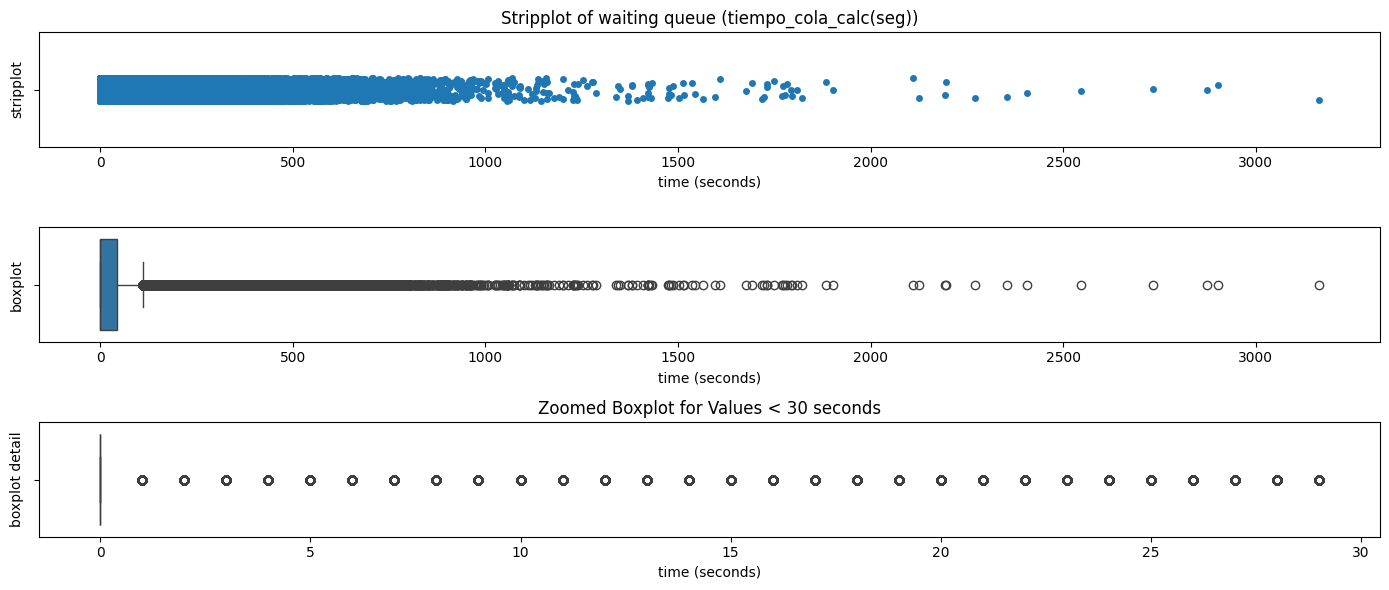

In [ ]:
# Se grafican nuevamente
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='tiempo_cola_calc(seg)', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (tiempo_cola_calc(seg))')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='tiempo_cola_calc(seg)', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['tiempo_cola_calc(seg)'] < 30], x='tiempo_cola_calc(seg)', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

### Total de ouliers mayores a 2000 segundos

In [ ]:
outlier_count = (df['tiempo_cola_calc(seg)'] > 2000).sum()

### Porcentaje de ouliers mayores a 2000 segundos

In [ ]:
perc_outlier = round(outlier_count/df['tiempo_cola_calc(seg)'].count()*100,2)

### Total de ouliers mayores a 1000 segundos

In [ ]:
outlier_count = (df['tiempo_cola_calc(seg)'] > 1000).sum()

### Porcentaje de ouliers mayores a 1000 segundos

In [ ]:
perc_outlier = round(outlier_count/df['tiempo_cola_calc(seg)'].count()*100,2)

##Comprobacion de eliminacion de outliers

In [ ]:
df = df[df['tiempo_cola_calc(seg)'] <= 1000] # se elimina a todos los valores mayores a 1000 segundos de espera 138 llamadas
(df['tiempo_cola_calc(seg)'] > 1000).sum()

0

## Desglose por tiempo de cola de los clientes que abandonan

In [ ]:
# Filtramos por los tiempo_cola_calc de los clientes que abandonan para que no nos afecte el calculo del minimo, promedio y maximo
filtered_df = df[df['CATEGORIA_DE_ABANDONO'] != 'ABANDONADO_EN_ESPERA'] #23.828 rows
filtered_df.head(2)

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,...,hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg),mes,dia,hora_entrada_llamada_corr,CATEGORIA_DE_ABANDONO
0,1999-01-01,CLIENTE_CON_ID,9664491.0,33116,HANG,2,PS,NO_SERVER,AA0101,1999-01-01 00:00:31,...,1999-01-01 00:00:36,1999-01-01 00:03:09,63,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1,1,1999-01-01 00:00:31,ABANDONADO_EN_SERVICIO
2,1999-01-01,CLIENTE_CON_ID,27997683.0,33118,AGENT,2,PS,MICHAL,AA0101,1999-01-01 06:55:20,...,1999-01-01 06:55:26,1999-01-01 06:55:43,0,1999-01-01 06:55:43,1999-01-01 06:56:37,54,1,1,1999-01-01 06:55:20,NO_ABANDONADO


In [ ]:
filtered_df['tiempo_cola_calc(seg)'].describe()

,tiempo_cola_calc(seg)
count,420371.000000
mean,44.086260
std,89.234266
min,0.000000
25%,0.000000
50%,0.000000
75%,50.000000
max,997.000000


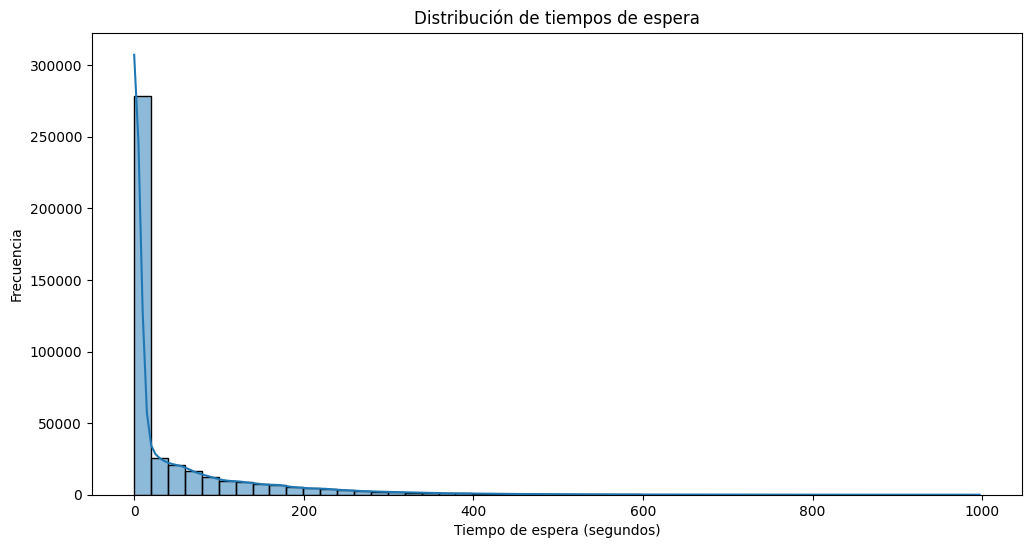

In [ ]:
# Graficamos la distribucion de tiempo_cola_calc(seg) para las llamadas no abandonadas antes de q_start
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['tiempo_cola_calc(seg)'], bins=50, kde=True)
plt.title('Distribución de tiempos de espera')
plt.xlabel('Tiempo de espera (segundos)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df['tiempo_cola_calc(seg)'].describe()

,tiempo_cola_calc(seg)
count,444199.000000
mean,41.721357
std,87.374352
min,0.000000
25%,0.000000
50%,0.000000
75%,44.000000
max,997.000000


In [ ]:
filtered_df['tiempo_cola_calc(seg)'].describe()


,tiempo_cola_calc(seg)
count,420371.000000
mean,44.086260
std,89.234266
min,0.000000
25%,0.000000
50%,0.000000
75%,50.000000
max,997.000000


In [ ]:
tabla_prioridad_2_no_abandonadas_df = filtered_df[(filtered_df['prioridad'] == 2)]
tabla_prioridad_2_no_abandonadas_df

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,...,hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg),mes,dia,hora_entrada_llamada_corr,CATEGORIA_DE_ABANDONO
0,1999-01-01,CLIENTE_CON_ID,9664491.0,33116,HANG,2,PS,NO_SERVER,AA0101,1999-01-01 00:00:31,...,1999-01-01 00:00:36,1999-01-01 00:03:09,63,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1,1,1999-01-01 00:00:31,ABANDONADO_EN_SERVICIO
2,1999-01-01,CLIENTE_CON_ID,27997683.0,33118,AGENT,2,PS,MICHAL,AA0101,1999-01-01 06:55:20,...,1999-01-01 06:55:26,1999-01-01 06:55:43,0,1999-01-01 06:55:43,1999-01-01 06:56:37,54,1,1,1999-01-01 06:55:20,NO_ABANDONADO
7,1999-01-01,CLIENTE_CON_ID,68062744.0,33123,AGENT,2,PS,KAZAV,AA0101,1999-01-01 08:42:13,...,1999-01-01 08:42:19,1999-01-01 08:42:23,0,1999-01-01 08:42:23,1999-01-01 08:45:30,187,1,1,1999-01-01 08:42:13,NO_ABANDONADO
9,1999-01-01,CLIENTE_CON_ID,1466671.0,33125,AGENT,2,PS,VICKY,AA0101,1999-01-01 09:04:04,...,1999-01-01 09:04:10,1999-01-01 09:04:56,0,1999-01-01 09:04:54,1999-01-01 09:06:37,103,1,1,1999-01-01 09:04:04,NO_ABANDONADO
11,1999-01-01,CLIENTE_CON_ID,23949225.0,33127,AGENT,2,PS,SHARON,AA0101,1999-01-01 09:27:03,...,1999-01-01 09:27:09,1999-01-01 09:28:00,0,1999-01-01 09:27:58,1999-01-01 09:31:13,195,1,1,1999-01-01 09:27:03,NO_ABANDONADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444355,1999-12-31,CLIENTE_CON_ID,69590081.0,50225,AGENT,2,PS,BASCH,AA0210,1999-12-31 10:21:25,...,1999-12-31 10:21:31,1999-12-31 10:22:13,0,1999-12-31 10:22:12,1999-12-31 10:23:25,73,12,31,1999-12-31 10:21:25,NO_ABANDONADO
444366,1999-12-31,CLIENTE_CON_ID,51306934.0,32939,AGENT,2,PS,YITZ,AA0213,1999-12-31 07:41:29,...,1999-12-31 07:41:35,1999-12-31 07:43:15,10,1999-12-31 07:43:14,1999-12-31 07:45:52,158,12,31,1999-12-31 07:41:29,NO_ABANDONADO
444369,1999-12-31,CLIENTE_CON_ID,1161660.0,32942,AGENT,2,PS,AVNI,AA0213,1999-12-31 09:00:24,...,1999-12-31 09:00:30,1999-12-31 09:00:35,0,1999-12-31 09:00:34,1999-12-31 09:06:26,352,12,31,1999-12-31 09:00:24,NO_ABANDONADO
444373,1999-12-31,CLIENTE_CON_ID,46880613.0,32946,AGENT,2,PS,ROTH,AA0213,1999-12-31 10:21:24,...,1999-12-31 10:21:30,1999-12-31 10:21:57,0,1999-12-31 10:21:56,1999-12-31 10:24:21,145,12,31,1999-12-31 10:21:24,NO_ABANDONADO


In [ ]:
promedio_tiempo_en_cola_prioridad_2 = tabla_prioridad_2_no_abandonadas_df['tiempo_cola_calc(seg)'].mean()
promedio_tiempo_en_cola_prioridad_2

32.63044712252205

In [ ]:
tabla_prioridad_2_no_abandonadas_df ['tiempo_cola_calc(seg)'].describe()

,tiempo_cola_calc(seg)
count,137412.000000
mean,32.630447
std,75.086060
min,0.000000
25%,0.000000
50%,0.000000
75%,27.000000
max,982.000000


## Conclusiones

Sobre los clientes que efectivamente son atendidos, el 80% que permanece:
El tiempo promedio en cola de espera es 89 segundos (1.43 minutos)
El 25% de las llamadas permanecen en cola menos de 1 segundo, son atendidas de inmediato.
El 75% de los clientes en cola espera menos de 1 minuto, 50 segundos.
Sobre los clientes con prioridad ('priority' ==2), que son atendidos, o permanecen en cola hasta ser atendidos:

El total de clientes con prioridad atendidos es de 137.412 llamados, es 99% de los clientes prioritarios que llamaron y fueron identificados
El tiempo promedio de espera en cola para ellos es de 32 segundos equivalente a 0.5 minutos promedio.
El 50% es atendido enseguida, 0 segundos por arriba del nivel de servicio.
El restante 25%, 75% permanece en cola menos de 30 segundos.

In [ ]:
df_filtro_no_abandonan = df[(df['CATEGORIA_DE_ABANDONO'] != 'ABANDONADO_EN_ESPERA') & (df['CATEGORIA_DE_ABANDONO'] != 'ABANDONADO_EN_SERVICIO')]
df_filtro_no_abandonan.head(2)

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,...,hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg),mes,dia,hora_entrada_llamada_corr,CATEGORIA_DE_ABANDONO
2,1999-01-01,CLIENTE_CON_ID,27997683.0,33118,AGENT,2,PS,MICHAL,AA0101,1999-01-01 06:55:20,...,1999-01-01 06:55:26,1999-01-01 06:55:43,0,1999-01-01 06:55:43,1999-01-01 06:56:37,54,1,1,1999-01-01 06:55:20,NO_ABANDONADO
3,1999-01-01,CLIENTE_SIN_ID,0.0,33119,AGENT,0,PS,BASCH,AA0101,1999-01-01 07:41:16,...,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 07:41:25,1999-01-01 07:44:53,208,1,1,1999-01-01 07:41:16,NO_ABANDONADO


In [ ]:
df_filtro_no_abandonan['ID_de_CLIENTE'].count()

357199

In [ ]:
df_filtro_no_abandonan['CATEGORIA_CLIENTE'].value_counts()

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,172881
CLIENTE_SIN_ID,142668
CLIENTE_PROSPECTO,41678


In [ ]:
desglose_promedio_sin_tiempo_de_espera  = df_filtro_no_abandonan.groupby('CATEGORIA_CLIENTE')['tiempo_espera_calc(seg)'].mean()
desglose_promedio_sin_tiempo_de_espera

,tiempo_espera_calc(seg)
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,5.645837
CLIENTE_PROSPECTO,11.628701
CLIENTE_SIN_ID,11.232953


In [ ]:
desglose_total_categoria_no_abandona = df_filtro_no_abandonan['CATEGORIA_CLIENTE'].value_counts()
desglose_total_categoria_no_abandona

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,172881
CLIENTE_SIN_ID,142668
CLIENTE_PROSPECTO,41678


In [ ]:
total_categoria_no_abandona= desglose_total_categoria_no_abandona.sum()
total_categoria_no_abandona

357227

In [ ]:
desglose_porcentaje_categoria_no_abandona = round((desglose_total_categoria_no_abandona / total_ID_de_CLIENTE) * 100,0)
desglose_porcentaje_categoria_no_abandona

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,39.0
CLIENTE_SIN_ID,32.0
CLIENTE_PROSPECTO,9.0


### Tabla dataframe de numero y porcentajes de clientes por categoria

In [ ]:
not_result_df = pd.DataFrame({'Total': desglose_total_categoria_no_abandona , 'Porcentaje': desglose_porcentaje_categoria_no_abandona})
not_result_df

,Total,Porcentaje
CATEGORIA_CLIENTE,,
CLIENTE_CON_ID,172881,39.0
CLIENTE_SIN_ID,142668,32.0
CLIENTE_PROSPECTO,41678,9.0


## Grafica: Diagrama de barras Cantidad de llamadas por Categoria de cliente

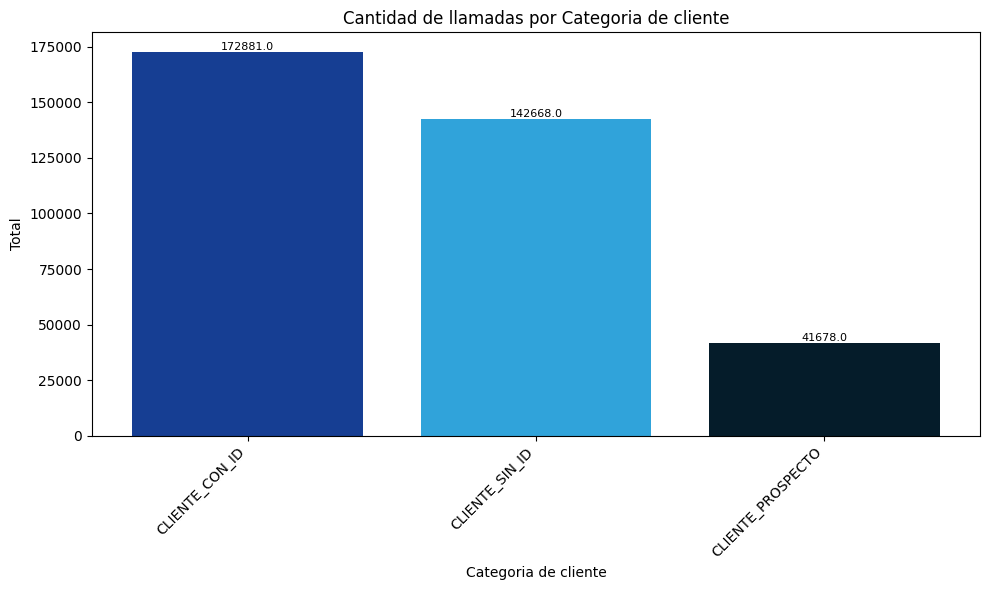

In [ ]:
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']

# Sort the DataFrame by counts in descending order
not_result_df_sorted = not_result_df.sort_values(by='Total', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(not_result_df_sorted.index, not_result_df_sorted['Total'], color=colors)

# Add labels and title
plt.xlabel('Categoria de cliente')
plt.ylabel('Total')
plt.title('Cantidad de llamadas por Categoria de cliente')


for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Graficas: Diagrama de barras Cantidad llamadas y Promedio de q_time por Categoria

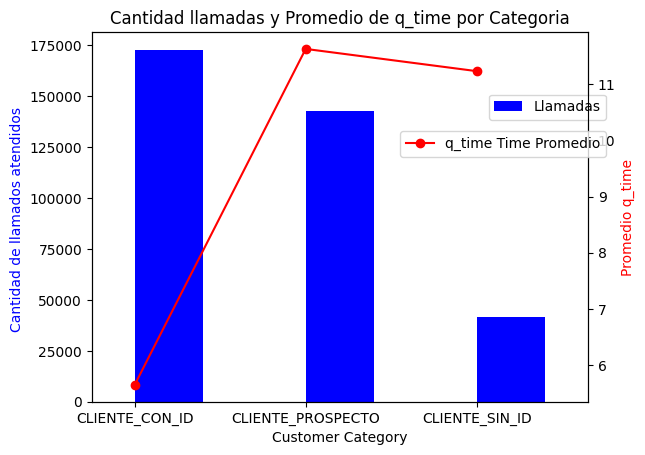

In [ ]:
# Vamos a graficarlos
fig, ax1 = plt.subplots()
# Graficamos con barras las llamadas que abandonan
desglose_total_categoria_no_abandona.plot(kind='bar', ax=ax1, color='b', position=0, width=0.4, label='Llamadas')
# Creamos un segundo grafico para el promedio
ax2 = ax1.twinx()
desglose_promedio_sin_tiempo_de_espera.plot(kind='line', ax=ax2, color='r', marker='o', label='q_time Time Promedio')
ax1.set_xlabel('Customer Category')
ax1.set_ylabel('Cantidad de llamados atendidos ', color='b')
ax2.set_ylabel('Promedio q_time', color='r')
plt.title('Cantidad llamadas y Promedio de q_time por Categoria')
ax1.tick_params(axis='x', rotation=0)
ax1.legend(loc='upper right', bbox_to_anchor=(1.05, 0.85))
ax2.legend(loc='upper right', bbox_to_anchor=(1.05, 0.75))
plt.show()


## Conclusiones

La tasa de servicio para las llamadas que no abandonan, el 80% de las llamadas, es muy bueno. Esta muy por debajo de lo prometido para los clientes prioritarios, y de hecho se cumple para todos los clientes prioritarios o no.

Es decir, el 75% de los clientes, sean o no prioritarios son atendidos en menos de 50 segundos, con un tiempo promedio en cola de 89 segundos = 1.43 minutos
Por lo tanto se da un servicio premium a todos los clientes sin distinción.

# **COLUMNA TIPO DE LLAMADA**

## Desglose tipo de llamada

In [ ]:
desglose_tipo_de_llamada_sr = df['tipo_de_llamada'].value_counts()
desglose_tipo_de_llamada_sr

,count
tipo_de_llamada,
AGENT,353082
HANG,87526
PHANTOM,3591


## Graficas

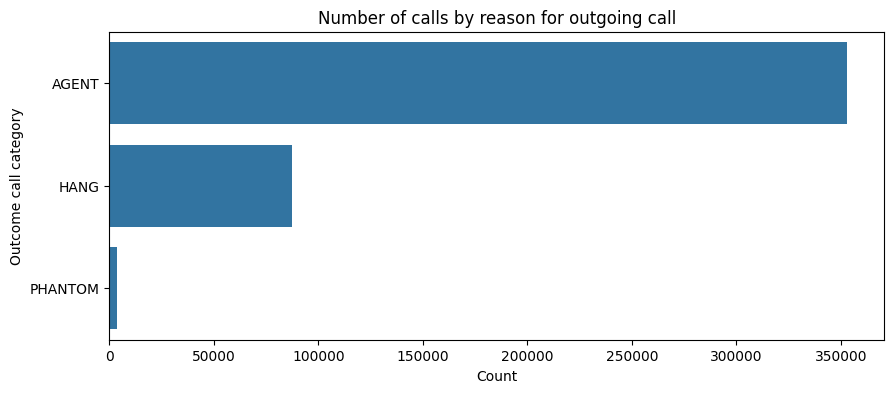

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=desglose_tipo_de_llamada_sr.values, y=desglose_tipo_de_llamada_sr.index)
plt.xlabel('Count')
plt.ylabel('Outcome call category')
plt.title('Number of calls by reason for outgoing call')
plt.show()

## Conclusiones

Se observan 3 categorías de posibles salidas de las llamadas tal lo informado:

La categoría predominante es AGENT que significa que se dio servicio.
Esto ocurre en el 79% de las llamadas.
Alrededor del 20% son llamados donde el cliente cortó o no se dio el servicio.
Hay 3 posibilidades de resolucion de una llamada:

AGENT = el 79% de las llamadas
HANG = el 20% de las llamadas ingresadas.
PHANTOM = Son 4.440 llamadas en total, un promedio de 12 llamadas por dia. Un 1% (una llamada en la que virtualmente se ignora)

# **COLUMNAS HORA DE ENTRADA Y SALIDA DE SERVICIO (hora_ent_servicio y hora_sal_servicio**)

In [ ]:
tabla_HORA_lun_a_jue_df['hora_ent_servicio'] = tabla_HORA_lun_a_jue_df['hora_ent_servicio'].dt.hour

In [ ]:
tabla_HORA_lun_a_jue_df['hora_sal_servicio'] = tabla_HORA_lun_a_jue_df['hora_sal_servicio'].dt.hour

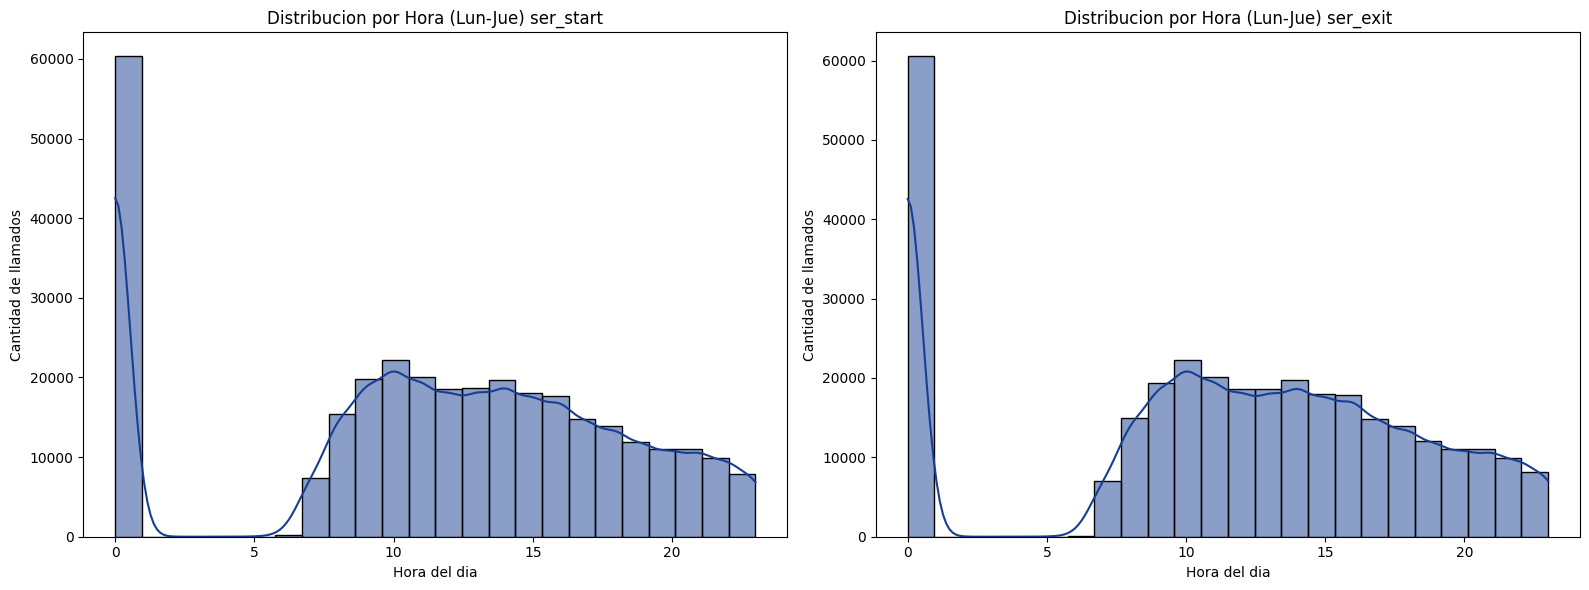

In [ ]:
# graficamos ambos juntos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
# Distribucion de tiempo en cola entrada
sns.histplot(tabla_HORA_lun_a_jue_df['hora_ent_servicio'], bins=24, kde=True, color='#163E93', ax=axes[0])
axes[0].set_title('Distribucion por Hora (Lun-Jue) ser_start')
axes[0].set_xlabel('Hora del dia')
axes[0].set_ylabel('Cantidad de llamados')
# Distribucion de tiempo en cola salida
sns.histplot(tabla_HORA_lun_a_jue_df['hora_sal_servicio'], bins=24, kde=True, color='#163E93', ax=axes[1])
axes[1].set_title('Distribucion por Hora (Lun-Jue) ser_exit')
axes[1].set_xlabel('Hora del dia')
axes[1].set_ylabel('Cantidad de llamados')
plt.tight_layout()
plt.show()

## Conclusiones

In [ ]:
prioritarias_no_abandonan = df[(df['CATEGORIA_DE_ABANDONO'] =='NO_ABANDONADO') & (df['prioridad'] == 2)]
prioritarias_no_abandonan


,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,...,hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg),mes,dia,hora_entrada_llamada_corr,CATEGORIA_DE_ABANDONO
2,1999-01-01,CLIENTE_CON_ID,27997683.0,33118,AGENT,2,PS,MICHAL,AA0101,1999-01-01 06:55:20,...,1999-01-01 06:55:26,1999-01-01 06:55:43,0,1999-01-01 06:55:43,1999-01-01 06:56:37,54,1,1,1999-01-01 06:55:20,NO_ABANDONADO
7,1999-01-01,CLIENTE_CON_ID,68062744.0,33123,AGENT,2,PS,KAZAV,AA0101,1999-01-01 08:42:13,...,1999-01-01 08:42:19,1999-01-01 08:42:23,0,1999-01-01 08:42:23,1999-01-01 08:45:30,187,1,1,1999-01-01 08:42:13,NO_ABANDONADO
9,1999-01-01,CLIENTE_CON_ID,1466671.0,33125,AGENT,2,PS,VICKY,AA0101,1999-01-01 09:04:04,...,1999-01-01 09:04:10,1999-01-01 09:04:56,0,1999-01-01 09:04:54,1999-01-01 09:06:37,103,1,1,1999-01-01 09:04:04,NO_ABANDONADO
11,1999-01-01,CLIENTE_CON_ID,23949225.0,33127,AGENT,2,PS,SHARON,AA0101,1999-01-01 09:27:03,...,1999-01-01 09:27:09,1999-01-01 09:28:00,0,1999-01-01 09:27:58,1999-01-01 09:31:13,195,1,1,1999-01-01 09:27:03,NO_ABANDONADO
13,1999-01-01,CLIENTE_CON_ID,49921232.0,33129,AGENT,2,PS,KAZAV,AA0101,1999-01-01 09:47:49,...,1999-01-01 09:47:55,1999-01-01 09:49:15,0,1999-01-01 09:49:14,1999-01-01 09:51:48,154,1,1,1999-01-01 09:47:49,NO_ABANDONADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444355,1999-12-31,CLIENTE_CON_ID,69590081.0,50225,AGENT,2,PS,BASCH,AA0210,1999-12-31 10:21:25,...,1999-12-31 10:21:31,1999-12-31 10:22:13,0,1999-12-31 10:22:12,1999-12-31 10:23:25,73,12,31,1999-12-31 10:21:25,NO_ABANDONADO
444366,1999-12-31,CLIENTE_CON_ID,51306934.0,32939,AGENT,2,PS,YITZ,AA0213,1999-12-31 07:41:29,...,1999-12-31 07:41:35,1999-12-31 07:43:15,10,1999-12-31 07:43:14,1999-12-31 07:45:52,158,12,31,1999-12-31 07:41:29,NO_ABANDONADO
444369,1999-12-31,CLIENTE_CON_ID,1161660.0,32942,AGENT,2,PS,AVNI,AA0213,1999-12-31 09:00:24,...,1999-12-31 09:00:30,1999-12-31 09:00:35,0,1999-12-31 09:00:34,1999-12-31 09:06:26,352,12,31,1999-12-31 09:00:24,NO_ABANDONADO
444373,1999-12-31,CLIENTE_CON_ID,46880613.0,32946,AGENT,2,PS,ROTH,AA0213,1999-12-31 10:21:24,...,1999-12-31 10:21:30,1999-12-31 10:21:57,0,1999-12-31 10:21:56,1999-12-31 10:24:21,145,12,31,1999-12-31 10:21:24,NO_ABANDONADO


In [ ]:
promedio_prioritarias_no_abandonan = prioritarias_no_abandonan['tiempo_de_serv_calc(seg)'].mean()
promedio_prioritarias_no_abandonan

208.31644015411322

In [ ]:
descripcion_prioritarias_no_abandonan= prioritarias_no_abandonan['tiempo_de_serv_calc(seg)'].describe()
descripcion_prioritarias_no_abandonan

,tiempo_de_serv_calc(seg)
count,118095.000000
mean,208.316440
std,285.399565
min,0.000000
25%,67.000000
50%,131.000000
75%,254.000000
max,30278.000000


#**COLUMNA TIEMPO DE SERVICIO CALCULADO**

In [ ]:
descripcion_tiempo_servicio_sr =df['tiempo_de_serv_calc(seg)'].describe()
descripcion_tiempo_servicio_sr

,tiempo_de_serv_calc(seg)
count,444199.000000
mean,152.387970
std,263.423452
min,0.000000
25%,12.000000
50%,84.000000
75%,185.000000
max,36291.000000


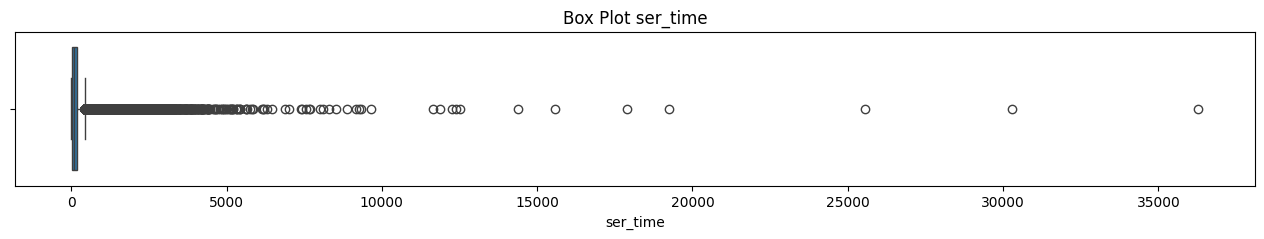

In [ ]:
# Box plot
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['tiempo_de_serv_calc(seg)'])
plt.title('Box Plot ser_time')
plt.xlabel('ser_time')
plt.show()

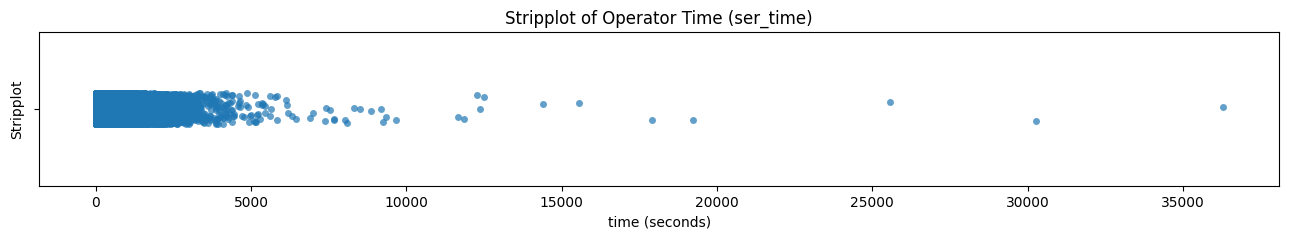

In [ ]:
# Strip plot
plt.figure(figsize=(16, 2))
sns.stripplot(data=df, x='tiempo_de_serv_calc(seg)', jitter=True, alpha=0.7)
plt.xlabel('time (seconds)')
plt.ylabel('Stripplot')
plt.title('Stripplot of Operator Time (ser_time)')
plt.show()

Text(0.5, 1.0, 'Zoomed Boxplot for Values < 30 seconds')

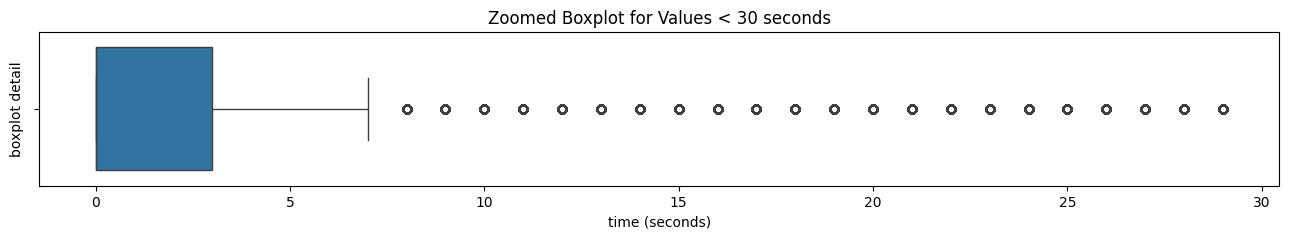

In [ ]:
# Zoomed Box Plot
plt.figure(figsize=(16, 2))
sns.boxplot(data=df[df['tiempo_de_serv_calc(seg)'] < 30], x='tiempo_de_serv_calc(seg)')
plt.xlabel('time (seconds)')
plt.ylabel('boxplot detail')
plt.title('Zoomed Boxplot for Values < 30 seconds')

In [ ]:
abandonos = (df['tiempo_de_serv_calc(seg)'] == 0).sum()
abandonos


87682

In [ ]:
perc_abandonos = round(abandonos/df['tiempo_de_serv_calc(seg)'].count()*100,2)
perc_abandonos

19.74

In [ ]:
outlier_count = (df['tiempo_de_serv_calc(seg)'] > 25000).sum()
outlier_count

3

In [ ]:
perc_outlier = round(outlier_count/df['tiempo_de_serv_calc(seg)'].count()*100,2)
perc_outlier

0.0

In [ ]:
outlier_count = (df['tiempo_de_serv_calc(seg)'] > 1000).sum()
outlier_count

5790

In [ ]:
perc_outlier = round(outlier_count/df['tiempo_de_serv_calc(seg)'].count()*100,2)
perc_outlier

1.3

## Chequeo

In [ ]:
df = df[df['tiempo_de_serv_calc(seg)'] <= 1000]
(df['tiempo_de_serv_calc(seg)'] > 1000).sum()

0

## Conclusiones

Como vimos, la tasa de abandono en esta etapa es del 14% de las llamadas.(ser_time ==0)
Se opta por una definicion de outliers de ser_time mayores a 1000 segundos.
Estos representan el 1.3% de los datos. Los eliminamos y volvemos a calcular las caracteristicas del servicio

In [ ]:
df['tiempo_de_serv_calc(seg)'].describe()

,tiempo_de_serv_calc(seg)
count,438409.000000
mean,133.687326
std,165.010813
min,0.000000
25%,10.000000
50%,82.000000
75%,178.000000
max,1000.000000


Ahora tenemos tiempos de servicio con una media de 133 segundos por llamado, apenas unos 2.21 minutos.
El 75% de los llamados se resuelven en menos de 178 segundos, 2.96 minutos

# **COLUMNA SERVIDOR**

In [ ]:
dicc_cambio_de_nombres

{'vru.line': 'Linea_VRU',
 'call_id': 'ID_de_llamada',
 'customer_id': 'ID_de_CLIENTE',
 'priority': 'prioridad',
 'type': 'tipo_de_servicio',
 'date': 'fecha(a-m-d)',
 'vru_entry': 'hora_entrada_llamada',
 'vru_exit': 'hora_salida_llamada',
 'vru_time': 'tiempo_espera_calc(seg)',
 'q_start': 'hora_entrada_cola',
 'q_exit': 'hora_salida_cola',
 'q_time': 'tiempo_cola_calc(seg)',
 'outcome': 'tipo_de_llamada',
 'ser_start': 'hora_ent_servicio',
 'ser_exit': 'hora_sal_servicio',
 'ser_time': 'tiempo_de_serv_calc(seg)',
 'server': 'SERVIDOR'}

In [ ]:
count_server = df['SERVIDOR'].value_counts()
count_server

,count
SERVIDOR,
NO_SERVER,96274
SHARON,27350
STEREN,20338
AVNI,19787
MORIAH,19422
AVI,19366
KAZAV,18527
YITZ,16962
TOVA,16957


In [ ]:
category_server = pd.DataFrame({'Category': count_server.index, 'Count': count_server.values})
category_server

,Category,Count
0,NO_SERVER,96274
1,SHARON,27350
2,STEREN,20338
3,AVNI,19787
4,MORIAH,19422
5,AVI,19366
6,KAZAV,18527
7,YITZ,16962
8,TOVA,16957
9,BASCH,15456


In [ ]:
top5 = df['SERVIDOR'].value_counts()[:5]
top5

,count
SERVIDOR,
NO_SERVER,96274
SHARON,27350
STEREN,20338
AVNI,19787
MORIAH,19422


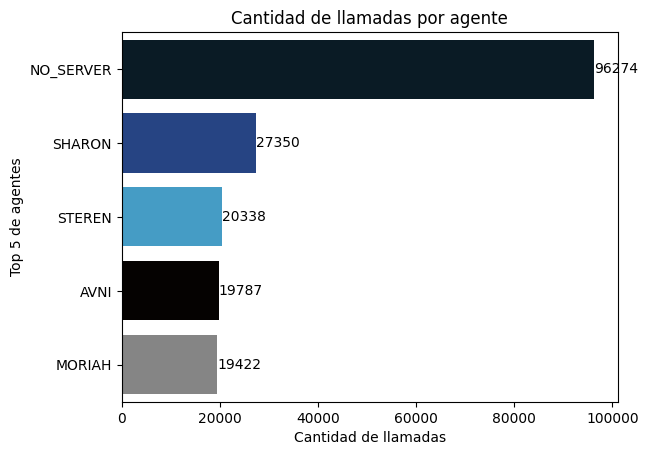

In [ ]:
#color pallete
colors = ['#051C2A','#163E93','#30A3DA','#060200','#858585']

# Use the palette parameter to set your custom color palette
sns.barplot(x=top5.values, y=top5.index.tolist(), hue=top5.index.tolist(), palette=colors, dodge=False)

# Add values to the bars
# Iterate directly over the values in the Series
for i, count in enumerate(top5):
    plt.text(count, i, str(count), ha='left', va='center')

plt.xlabel('Cantidad de llamadas')
plt.ylabel('Top 5 de agentes')
plt.title('Cantidad de llamadas por agente')
plt.show()

In [ ]:
round(((df['SERVIDOR'].value_counts() / len(df)) * 100),2)[:5]

,count
SERVIDOR,
NO_SERVER,21.96
SHARON,6.24
STEREN,4.64
AVNI,4.51
MORIAH,4.43


## Conclusiones

Hay 53 categorías de agentes que atienden los llamadas. Según se informa, la categoría NO_SERVER significa que a esa llamada no se le dio servicio. Esta categoría se encuentra en casi 22% de las llamadas.

Sin embargo, se tienen dudas de la calidad de esta columna, dado que se encontraron otras categorías que podrían significar lo mismo que NO_:_SERVER, como ANO_SERVERT y NO_SERVERAMA.

Por otra parte, se observa que el agente que mas llamados atiende es SHARON con el 6% de las llamadas, pero dada la calidad de la columna, donde se encontraron nombres que comienzan con Z1 y Z2, sin ninguna información al respecto, no se puede avanzar con el análisis certero de esta columna.

Si bien es una columna muy importante, hasta tanto tener mas información al respecto para la limpieza. Se elimina del conjunto.

In [ ]:
# Eliminación de server
df = df.drop('SERVIDOR', axis=1)